In [88]:
%load_ext autoreload
%autoreload 2


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
from matplotlib.ticker import FormatStrFormatter
import matplotlib.gridspec as gridspec
import mpmath as mp


from nest import detectors,  pls, skymap
from nest import overlap 
from nest import nell 
import pickle
from tqdm.notebook import tqdm, trange

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Checks if overlap_try.py and nell_try.py agree on the monopole

In [89]:
# overlap_try.py

f = np.logspace(-5, 0, 1000)

R_auto_t = overlap.Response.overlap('LISA 1', 'LISA 1', f, 0, 't', None)
R_cross_t = overlap.Response.overlap('LISA 1', 'LISA 2', f, 0, 't', None)

# nell_try.py

R0_auto_t = 2/5*nell.AngularResponse.R_ell(0, 'LISA 1', 'LISA 1', f, 't', shift_angle=None)
R0_cross_t = 2/5*nell.AngularResponse.R_ell(0, 'LISA 1', 'LISA 2', f, 't', shift_angle=None)

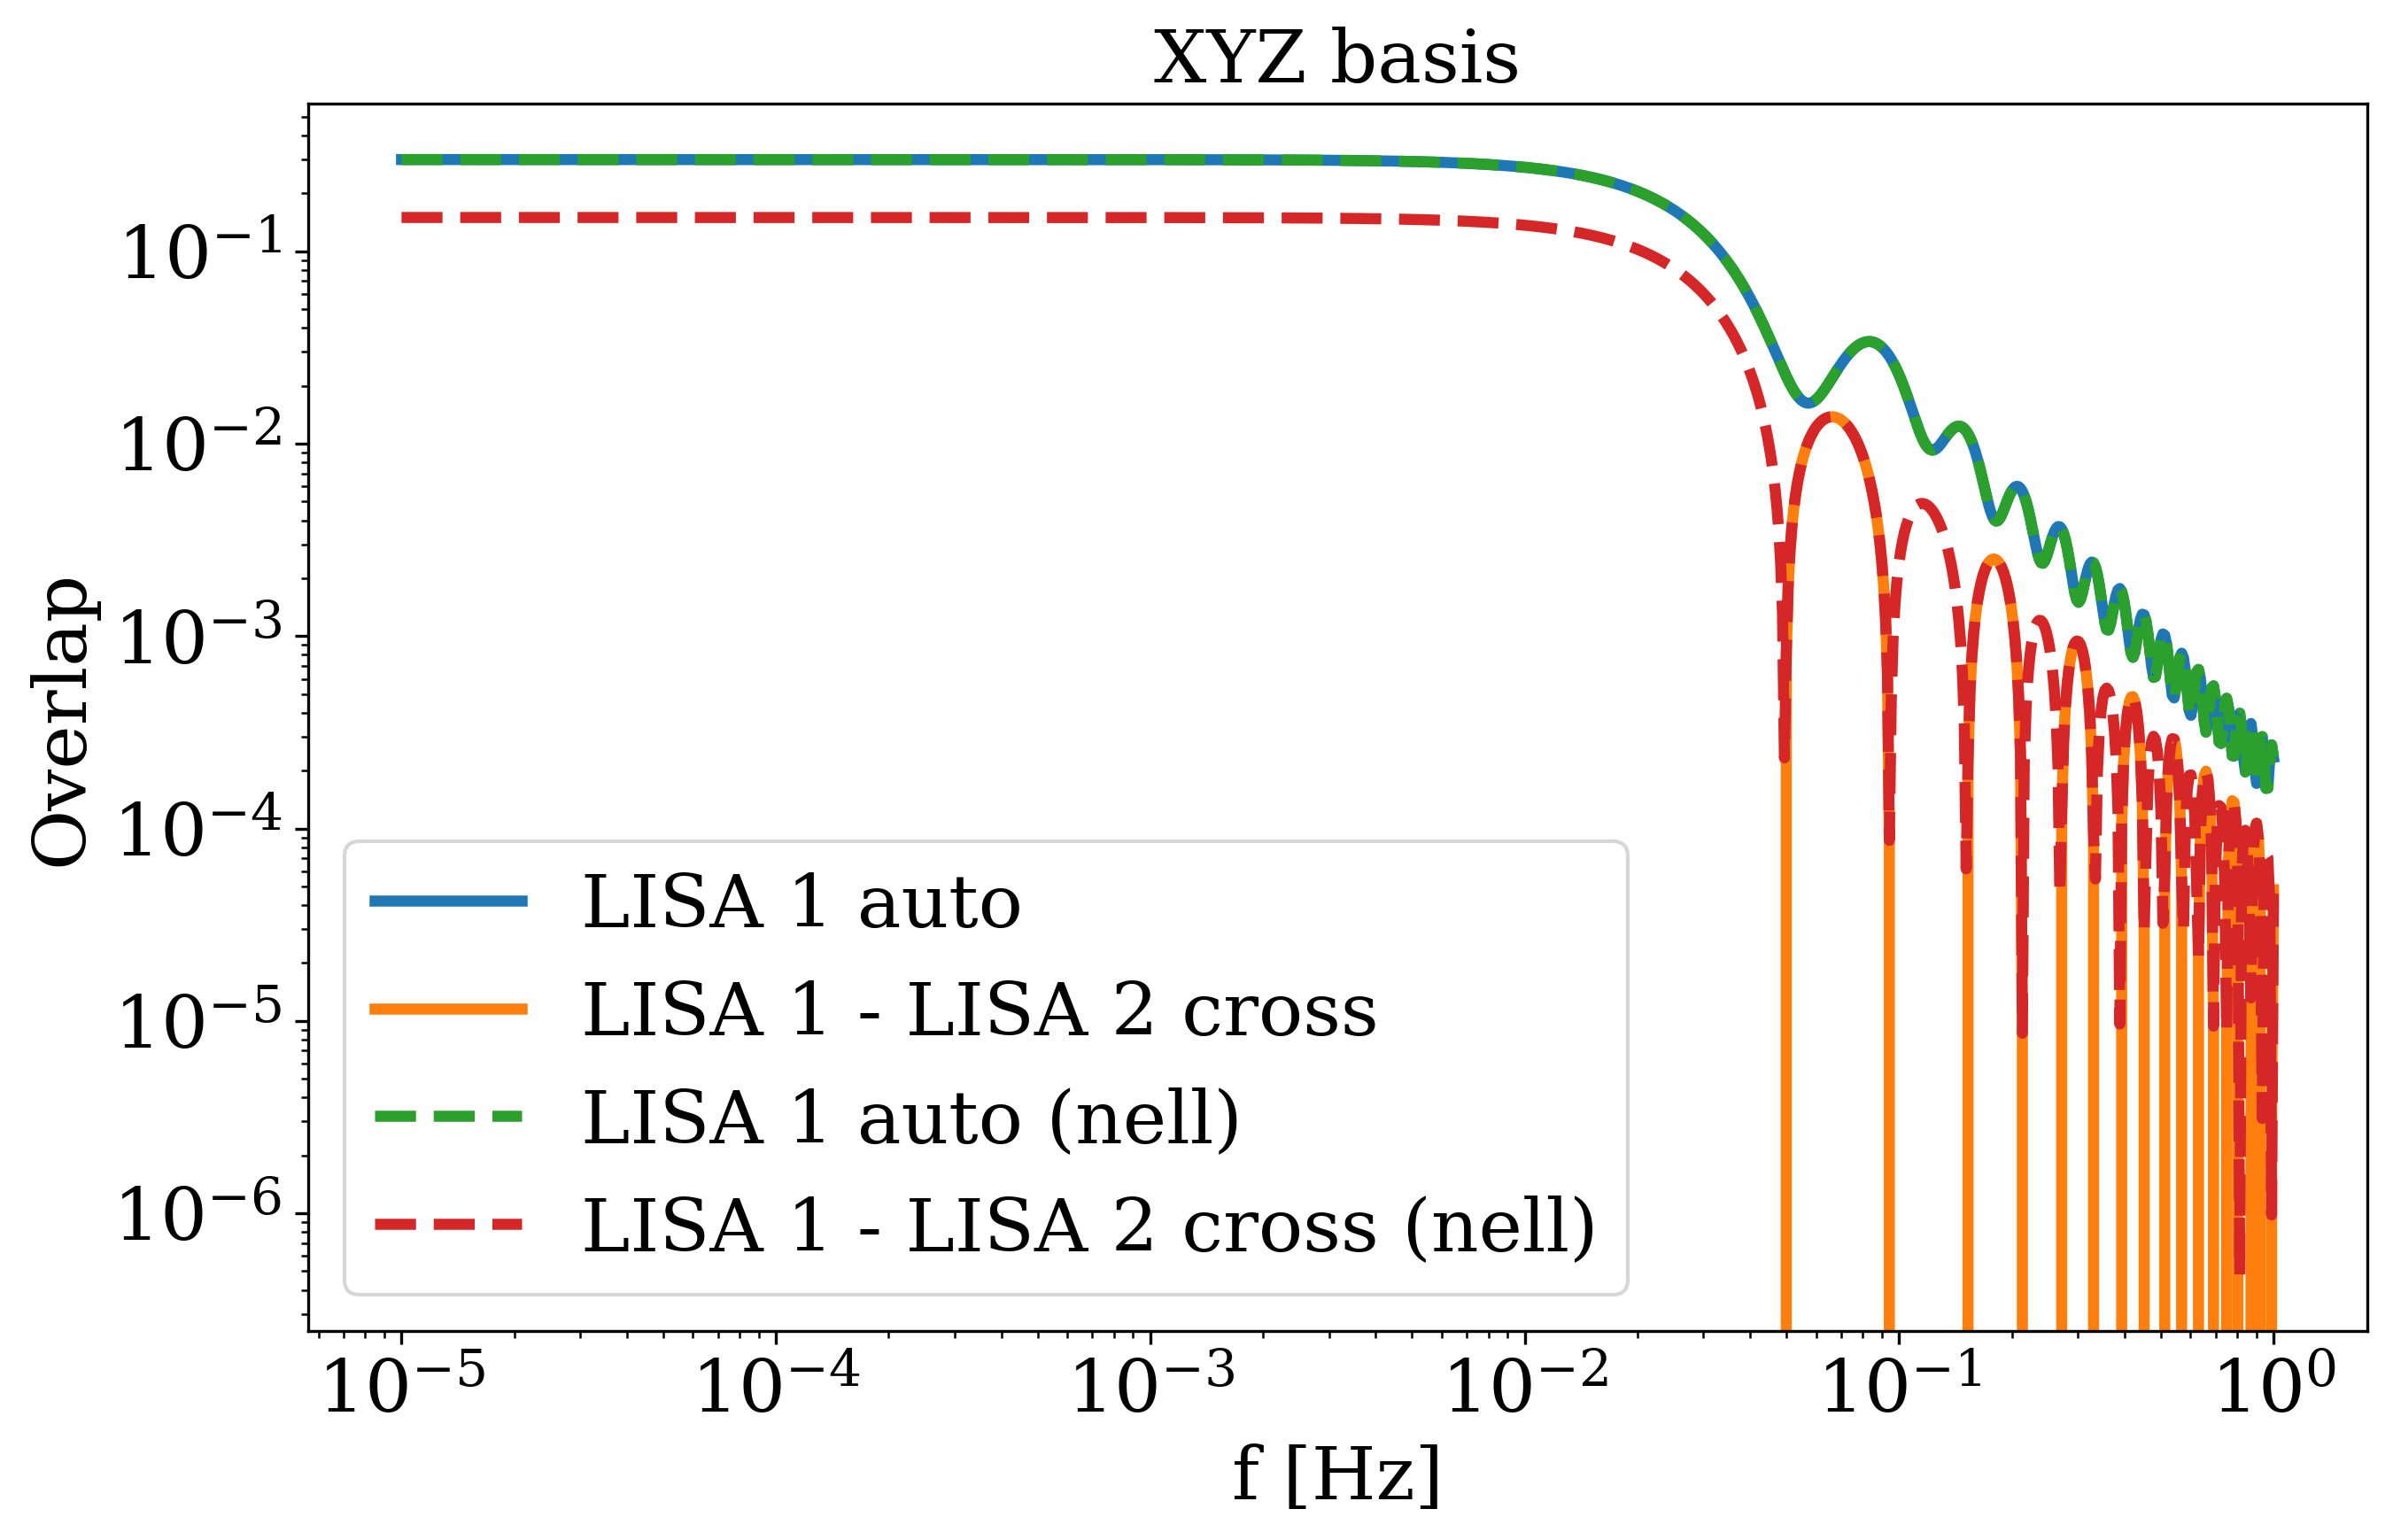

In [90]:
plt.figure(figsize=(10, 6))
plt.loglog(f, R_auto_t, label='LISA 1 auto')
plt.loglog(f, R_cross_t, label='LISA 1 - LISA 2 cross')
plt.loglog(f, R0_auto_t, label='LISA 1 auto (nell)', linestyle='--')    
plt.loglog(f, R0_cross_t, label='LISA 1 - LISA 2 cross (nell)', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel('Overlap')
plt.title('XYZ basis')
plt.legend()

In [91]:
R0_AA_t = R_auto_t - R_cross_t
R0_TT_t = R_auto_t + 2*R_cross_t
R0_AA_t_nell = nell.AngularResponse.R_ell_AET(0, 'AA', 't', f)
R0_TT_t_nell = nell.AngularResponse.R_ell_AET(0, 'TT', 't', f)

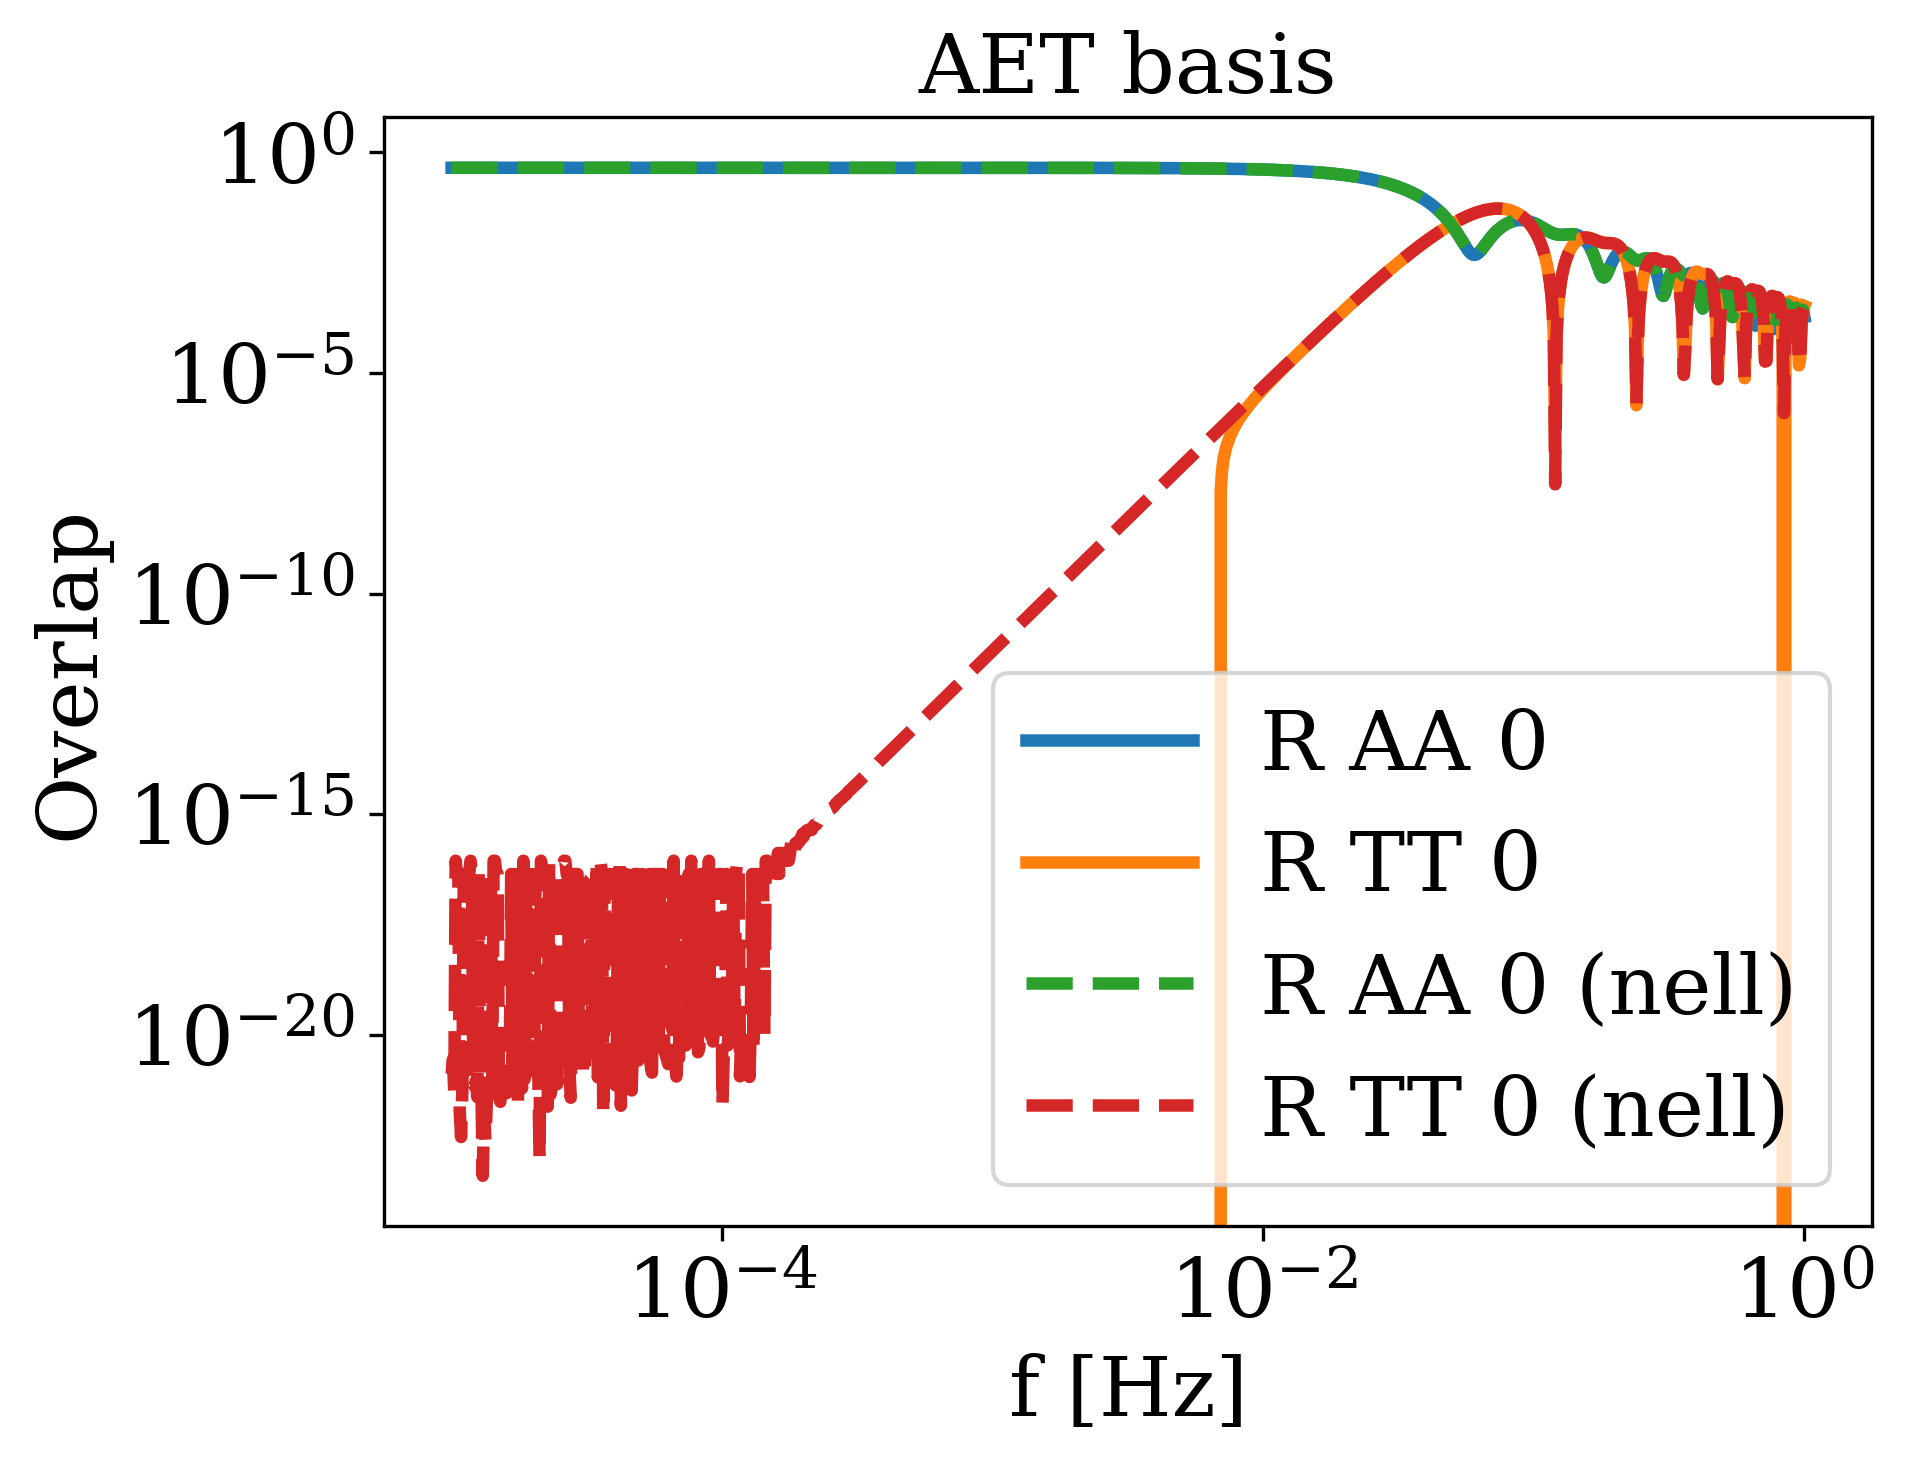

In [92]:
plt.plot(f, R0_AA_t, label='R AA 0 ')
plt.plot(f, R0_TT_t, label='R TT 0 ')
plt.plot(f, R0_AA_t_nell, label='R AA 0 (nell)', linestyle='--')
plt.plot(f, R0_TT_t_nell, label='R TT 0 (nell)', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel('Overlap')
plt.xscale('log')
plt.yscale('log')
plt.title('AET basis')
plt.legend()

* checks with nominal values in Bartolo et al 2022 (https://arxiv.org/pdf/2201.08782)

In [93]:
f_star = 0.019 # Hz
x = f/f_star

# R_0 AA

In [94]:
LISA_Rell_0_AA = nell.AngularResponse.R_ell_AET(0, 'AA', 't', f)
LISA_Rell_0_AA_interpolated = 9/20 - 169/1120*x 

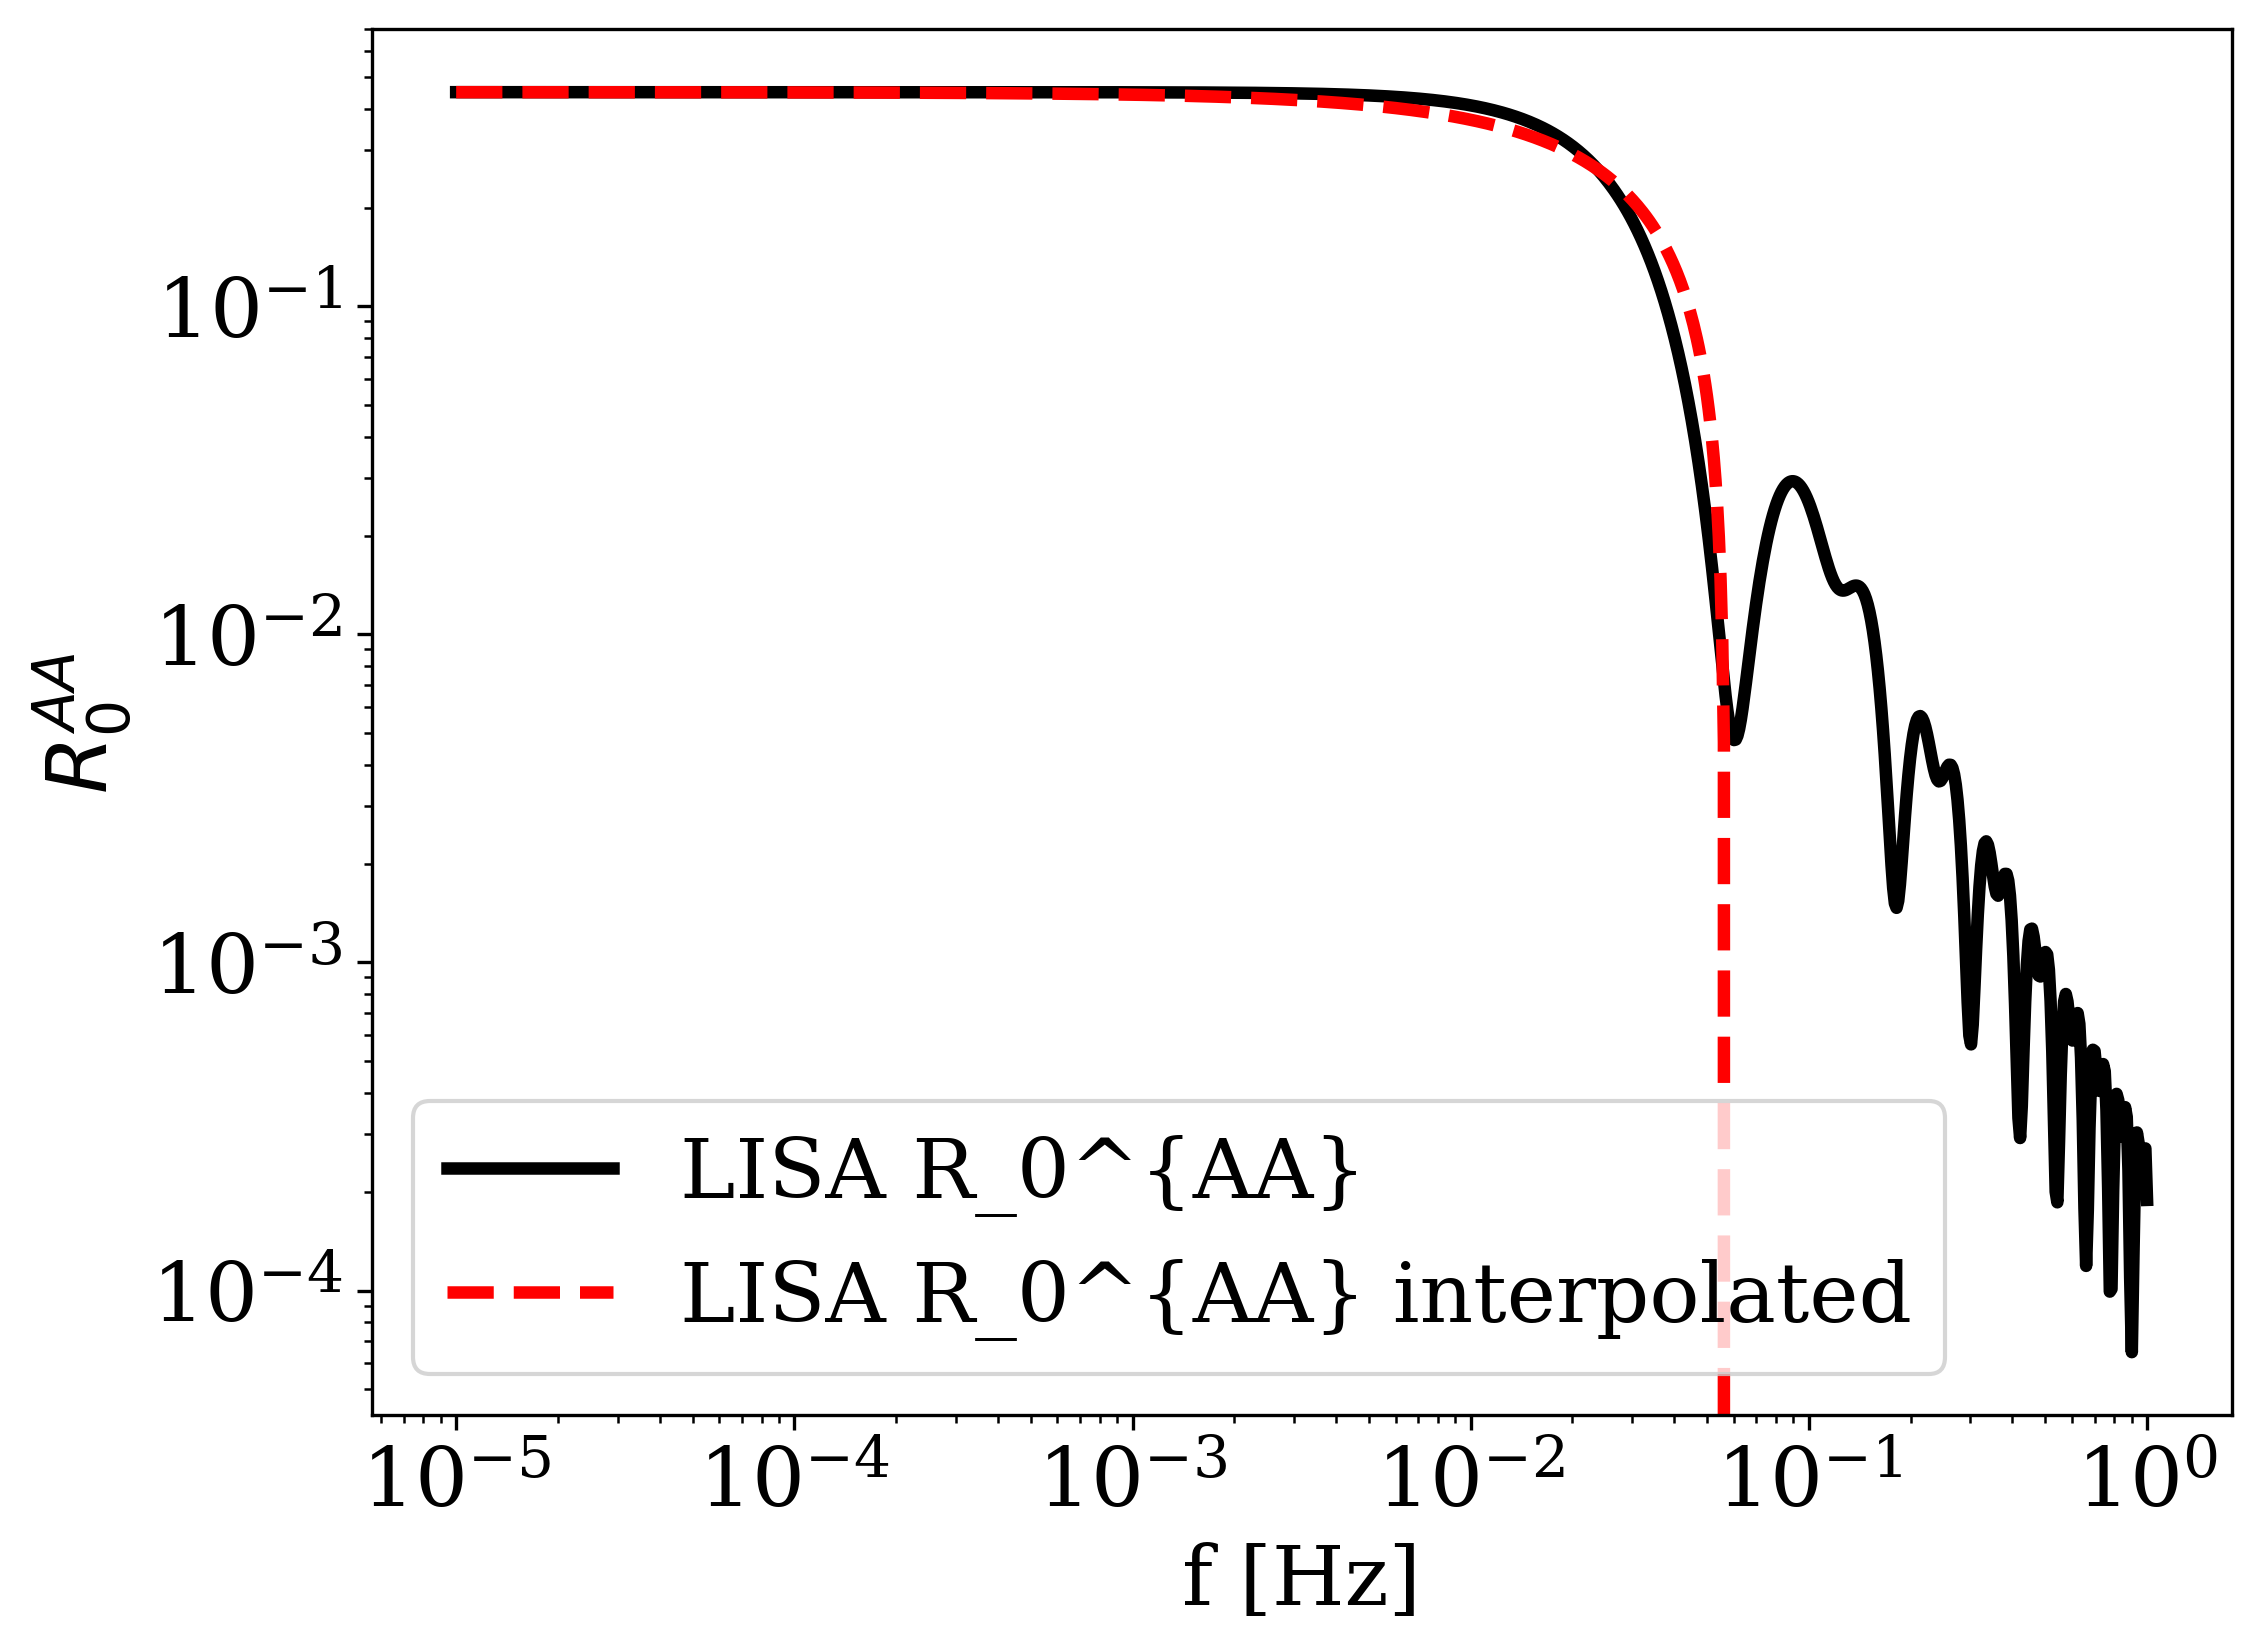

In [95]:
# plot the results

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_0_AA, label='LISA R_0^{AA}', color='black')
plt.loglog(f, LISA_Rell_0_AA_interpolated, label='LISA R_0^{AA} interpolated', color='red', linestyle='--')

plt.xlabel('f [Hz]')
plt.ylabel(r'$R_0^{AA}$')
plt.legend()


# R_2 AA

In [96]:
LISA_Rell_2_AA = nell.AngularResponse.R_ell_AET(2, 'AA', 't', f)
LISA_Rell_2_AA_interpolated = 9/14/np.sqrt(4) - 13/56/np.sqrt(5)*x**2

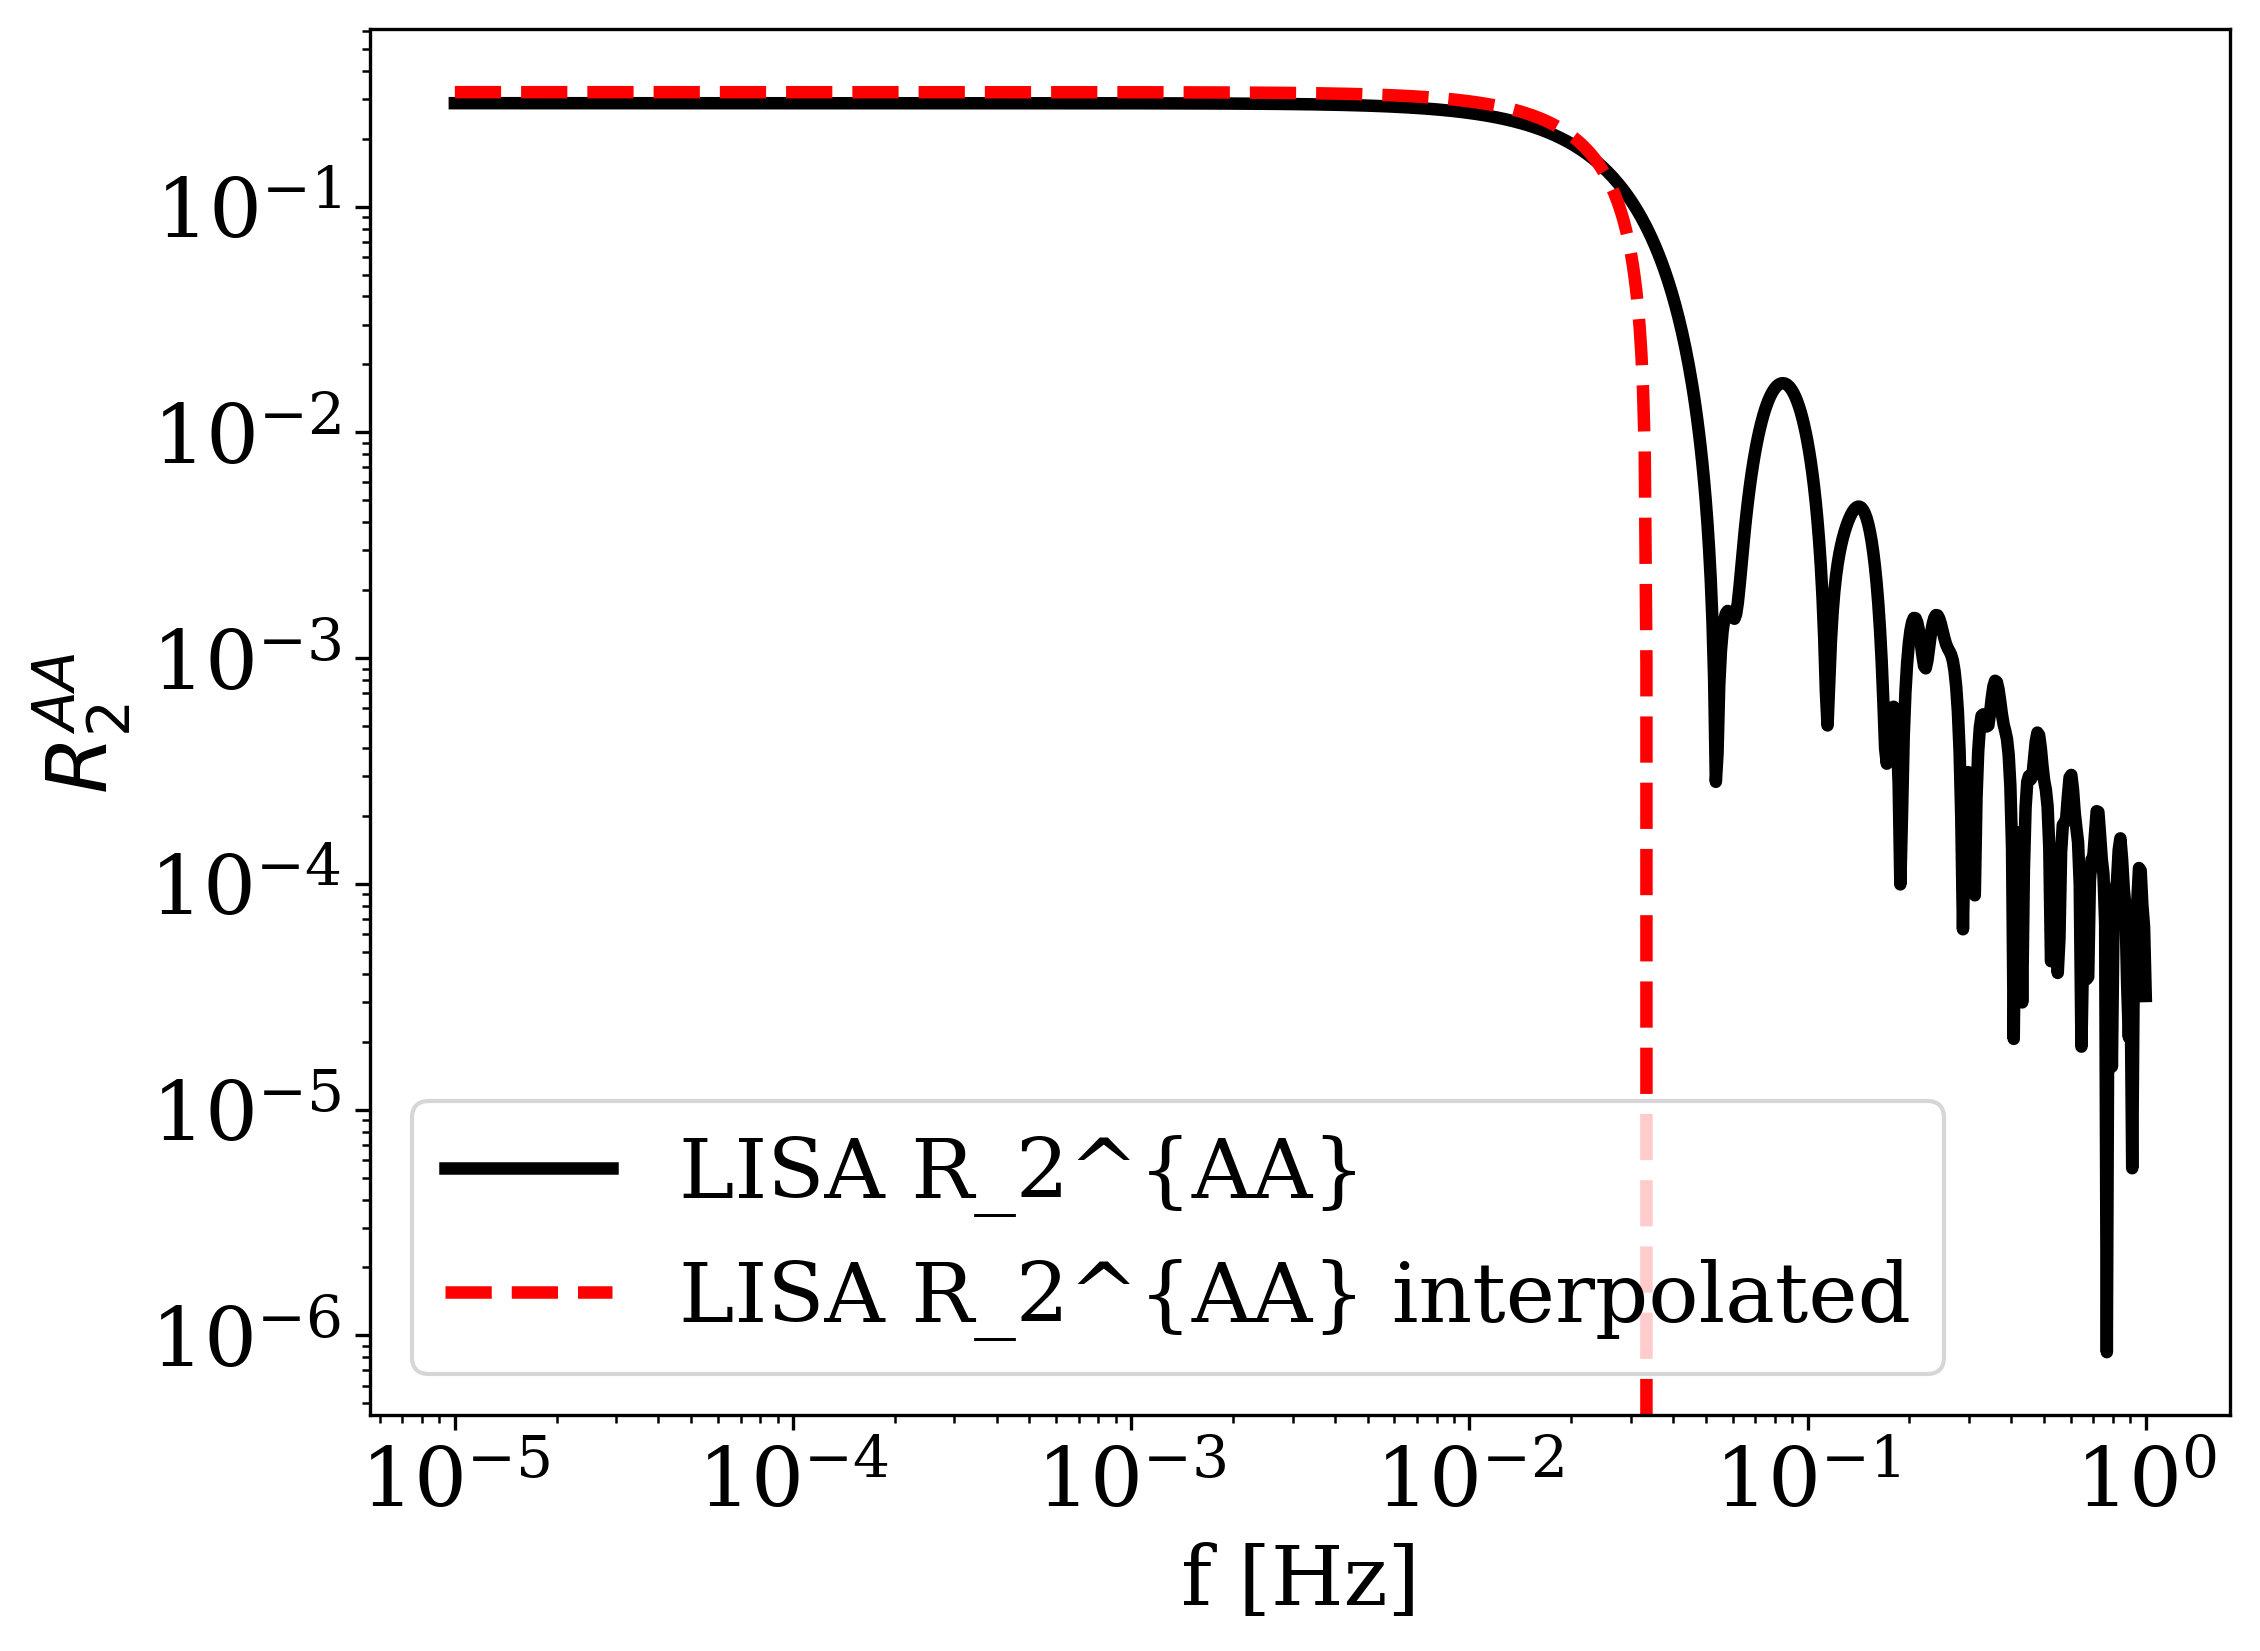

In [97]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AA, label='LISA R_2^{AA}', color='black')
plt.loglog(f, LISA_Rell_2_AA_interpolated, label='LISA R_2^{AA} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AA}$')
plt.legend()


# R_2 AT

In [98]:
LISA_Rell_2_AT = nell.AngularResponse.R_ell_AET(2, 'AT', 't', f)
LISA_Rell_2_AT_interpolated = x**4 /(192* np.sqrt(30))

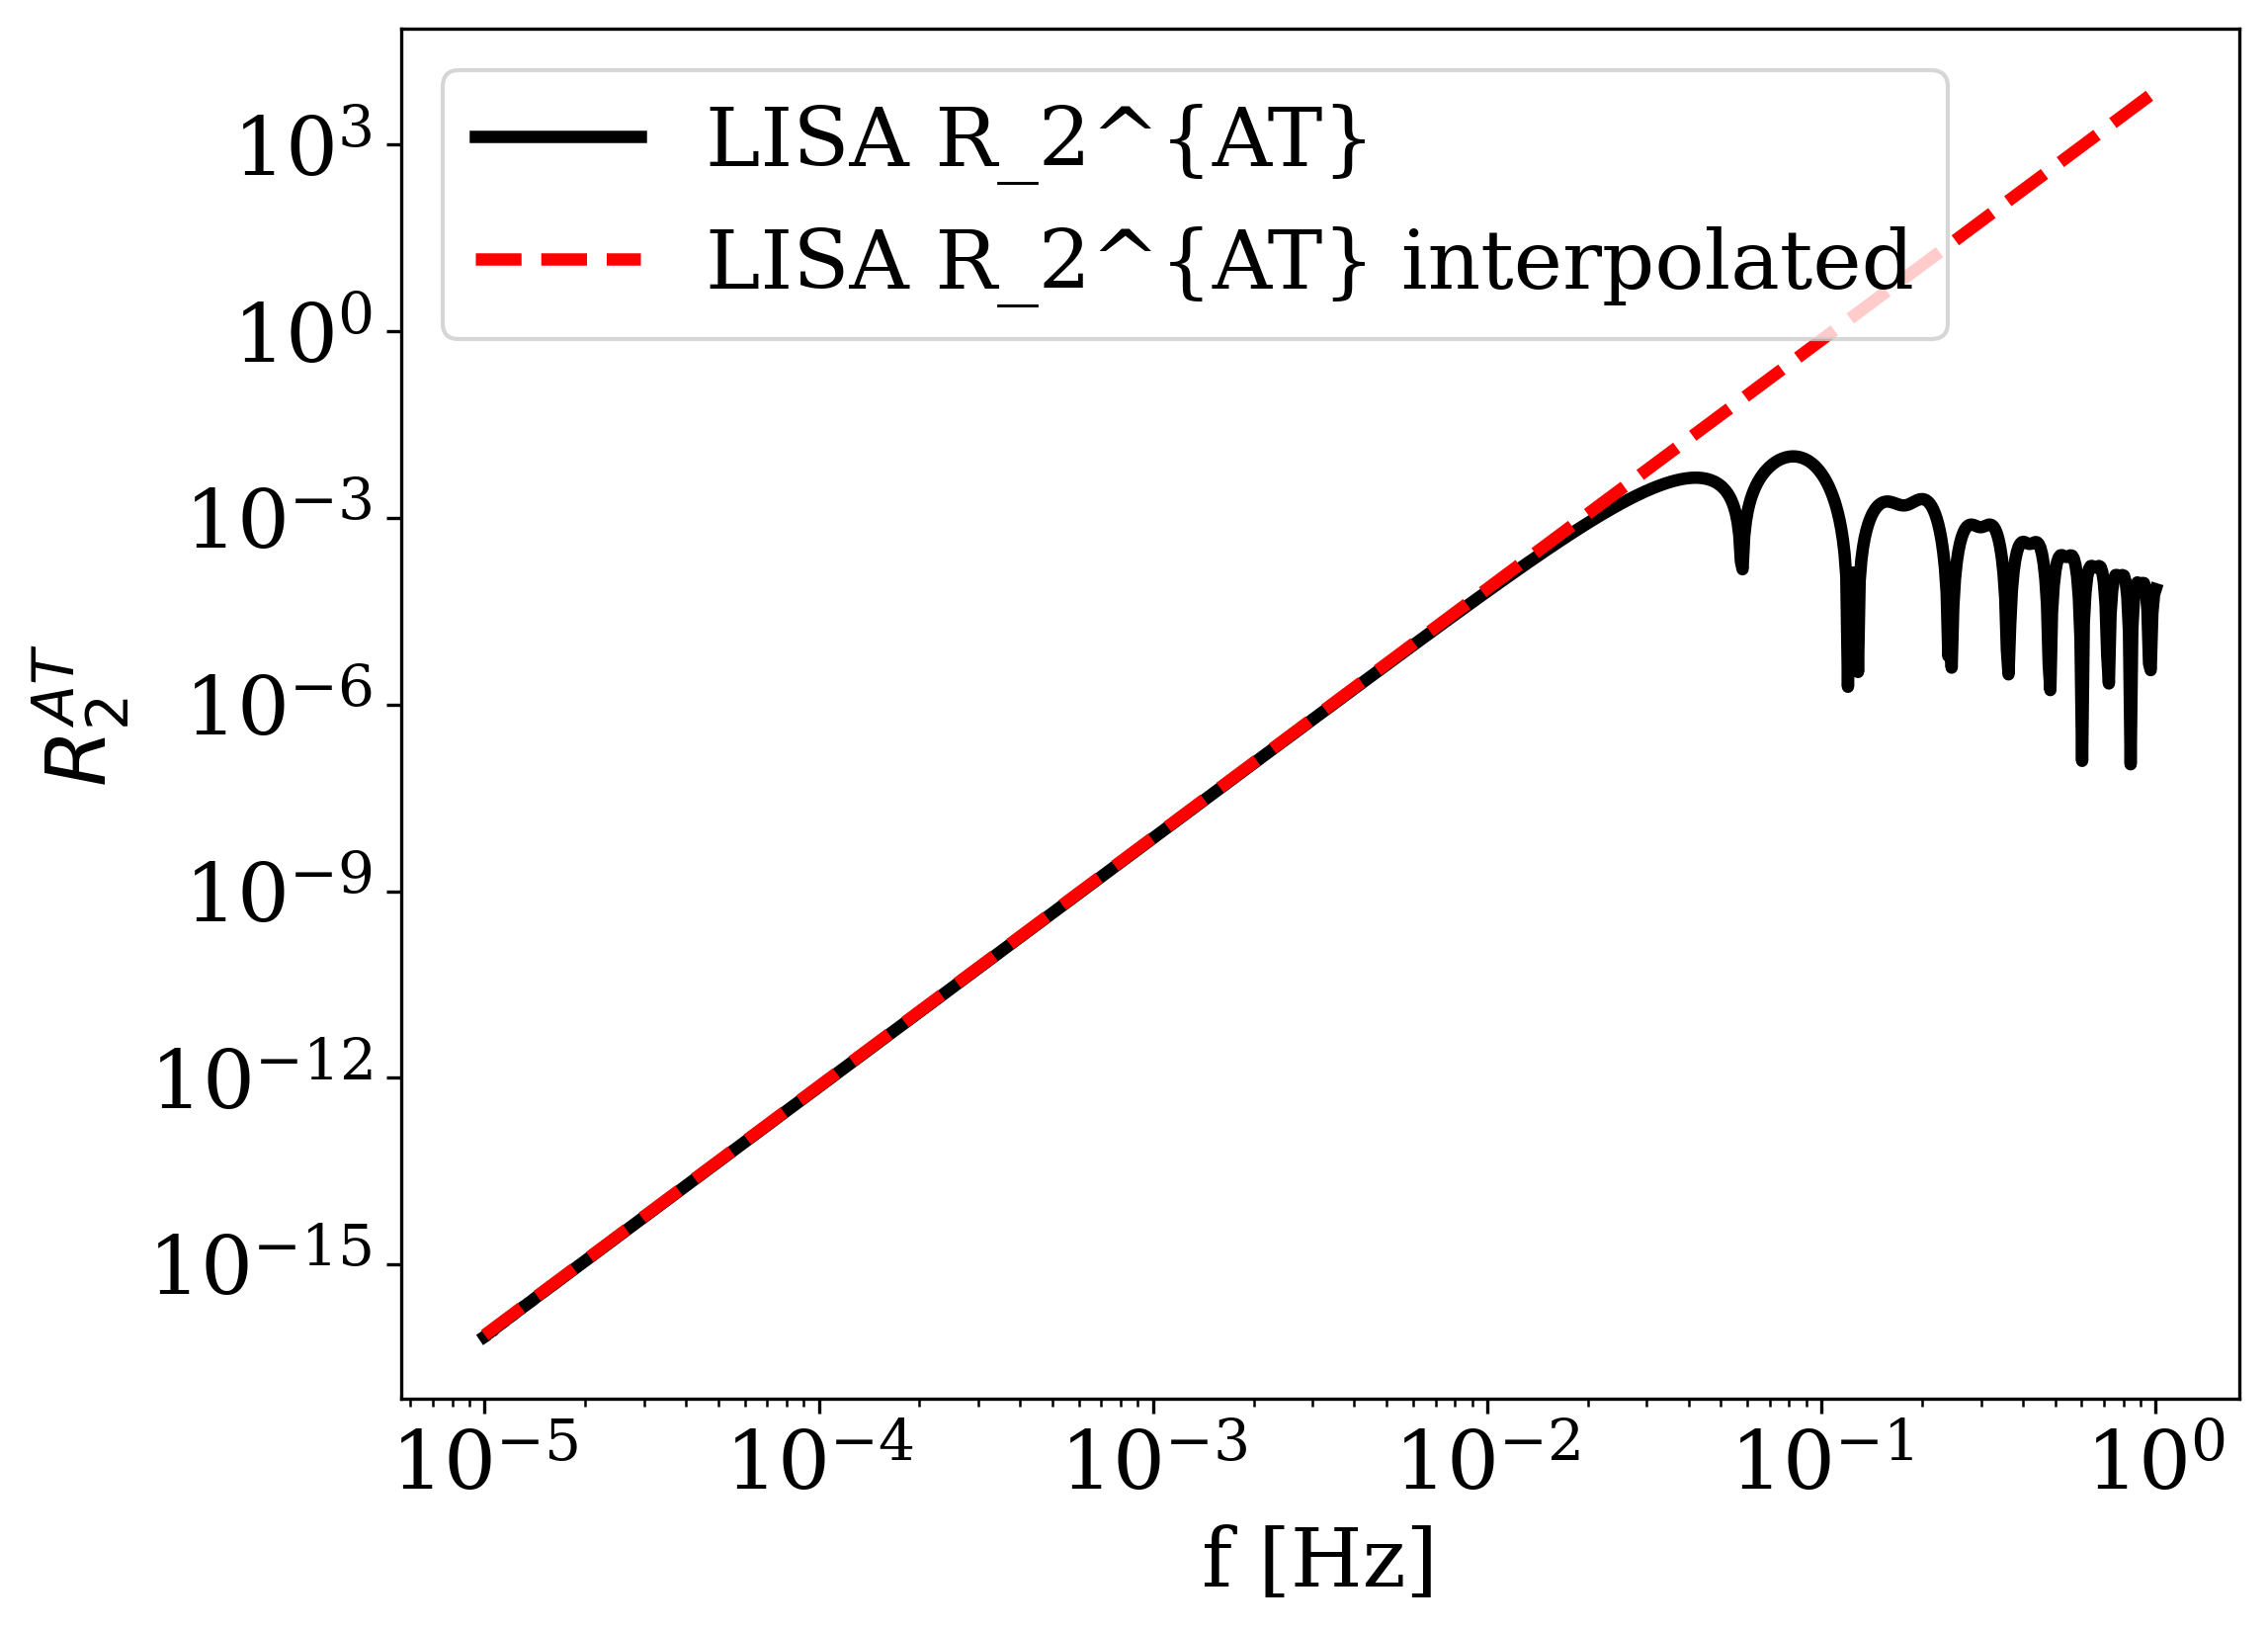

In [99]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AT, label='LISA R_2^{AT}', color='black')
plt.loglog(f, LISA_Rell_2_AT_interpolated, label='LISA R_2^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AT}$')
plt.legend()


# R_2 AE

In [100]:
LISA_Rell_2_AE = nell.AngularResponse.R_ell_AET(2, 'AE', 't', f)
LISA_Rell_2_AE_interpolated = np.sqrt(5/3)*( x**2 )/112

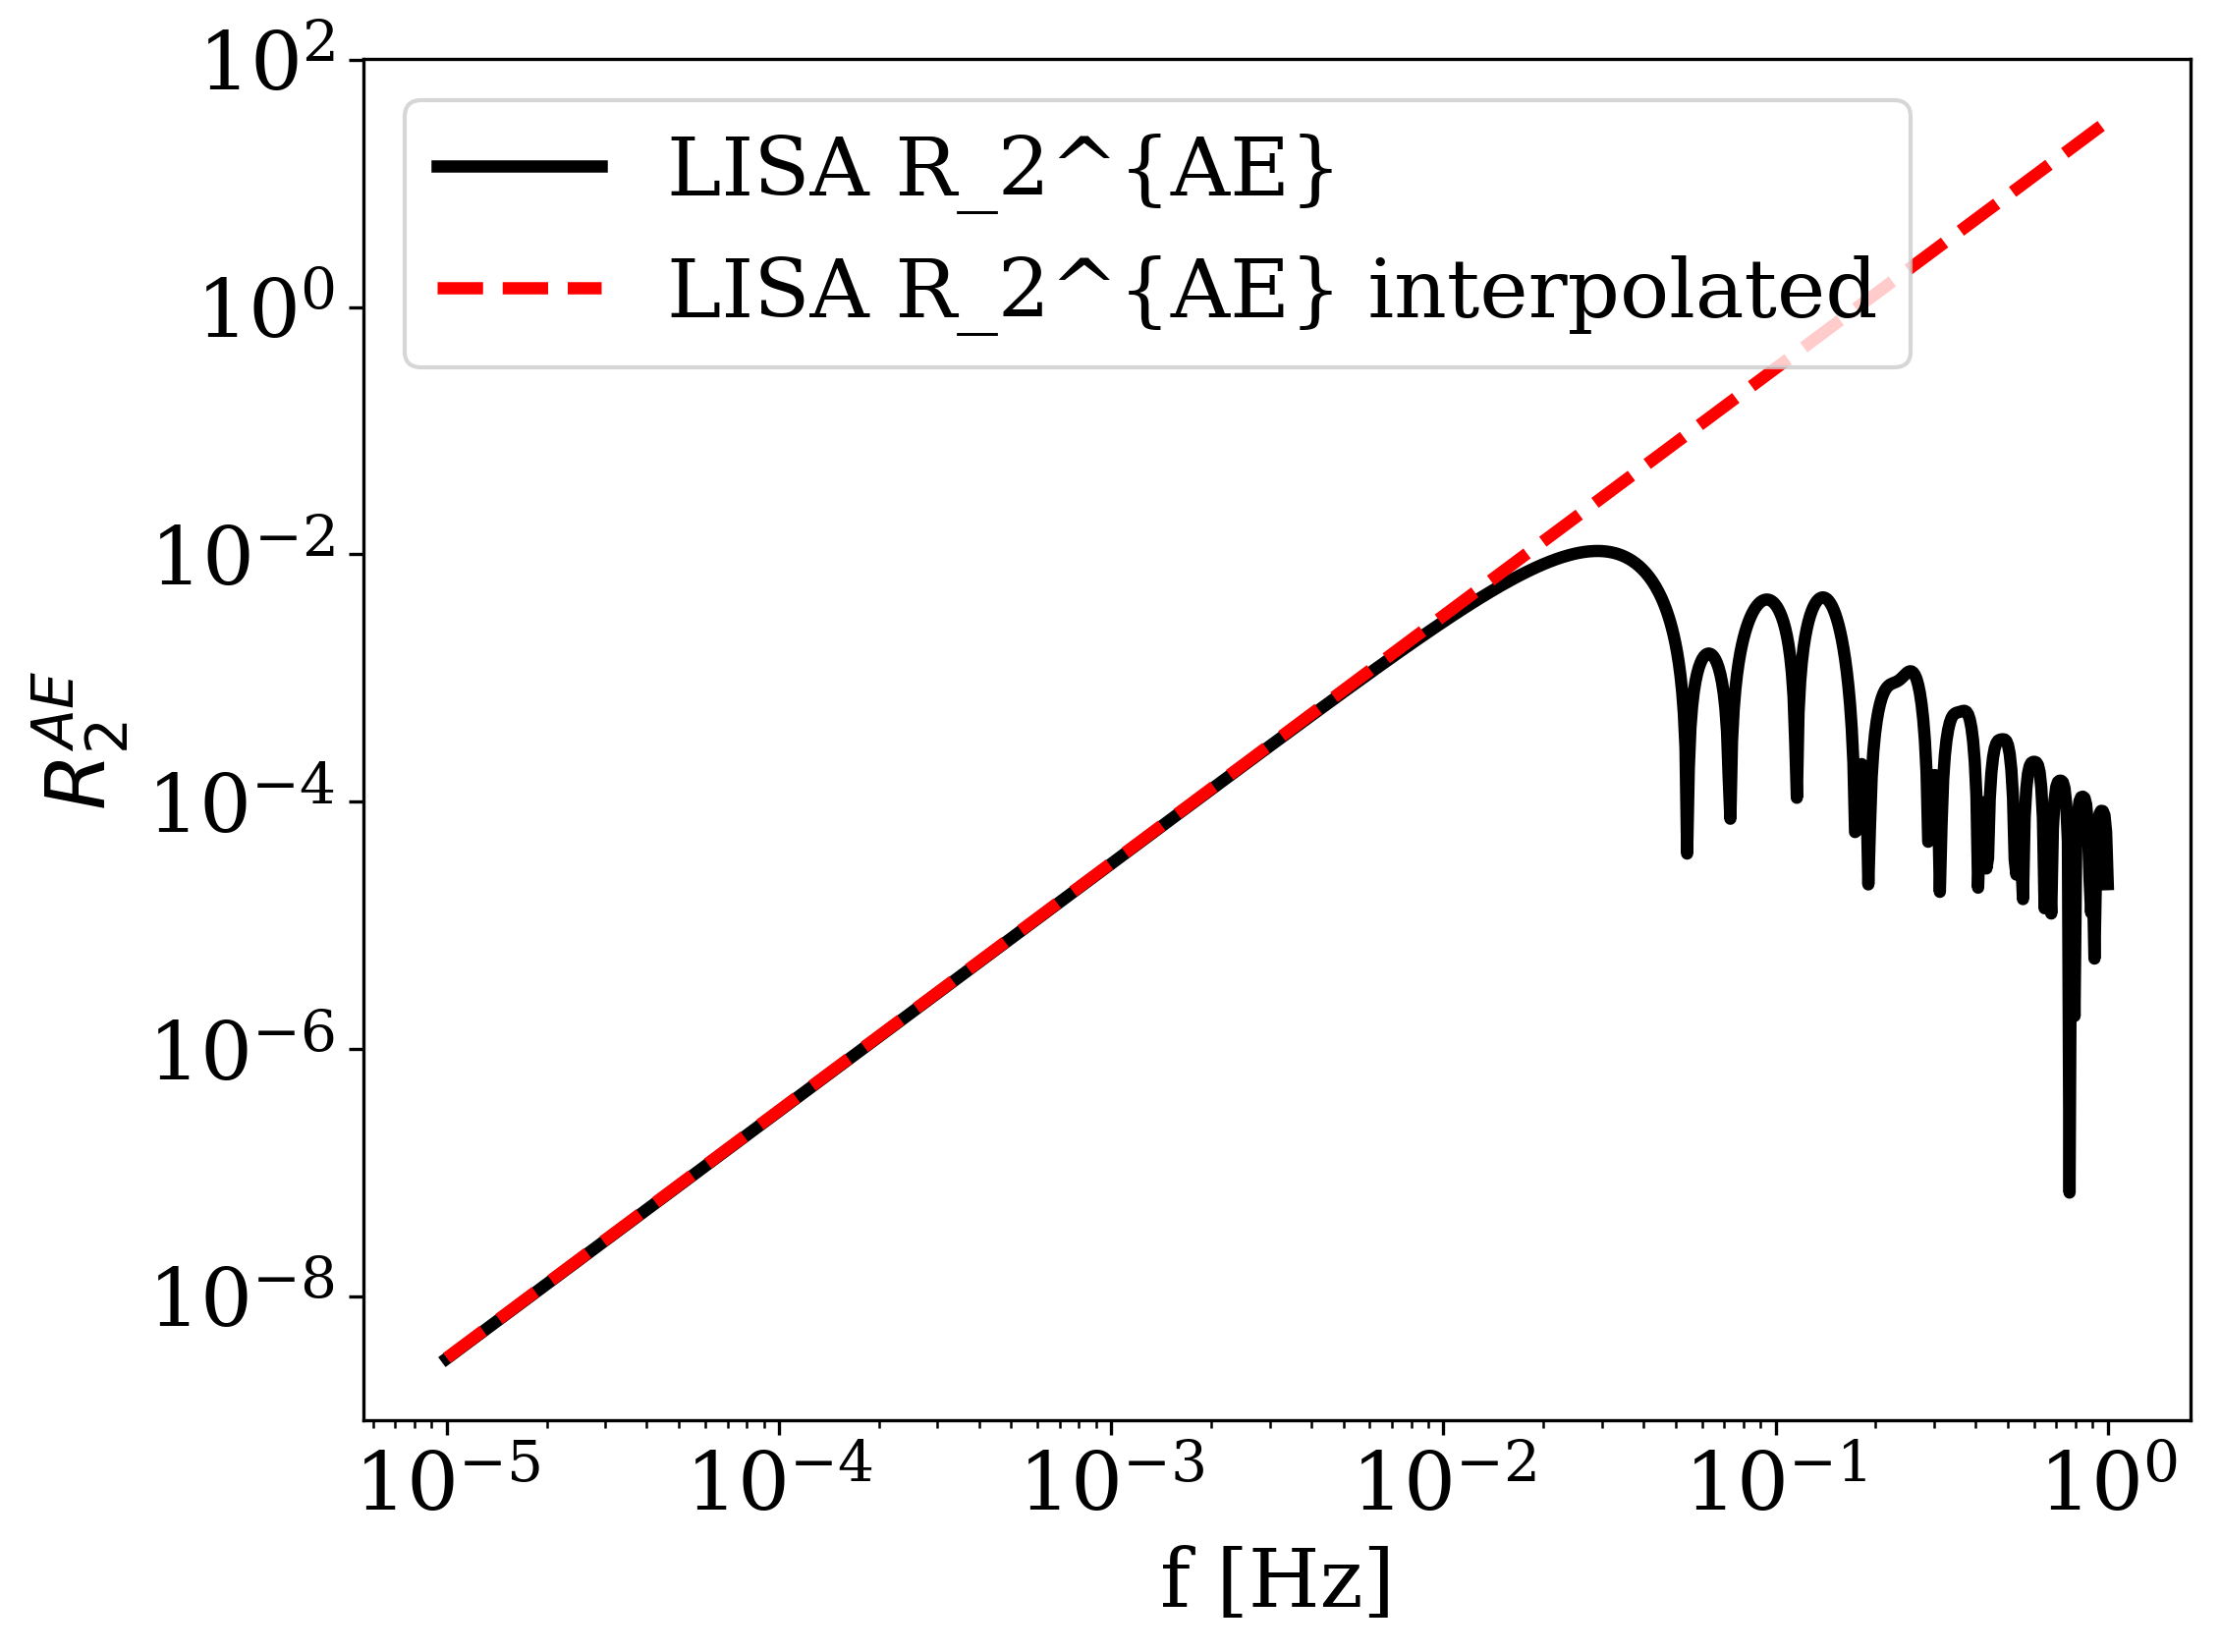

In [101]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_AE, label='LISA R_2^{AE}', color='black')
plt.loglog(f, LISA_Rell_2_AE_interpolated, label='LISA R_2^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{AE}$')
plt.legend()


# R_0 TT

In [102]:
LISA_Rell_0_TT = nell.AngularResponse.R_ell_AET(0, 'TT', 't', f)
LISA_Rell_0_TT_interpolated = x**6/4032

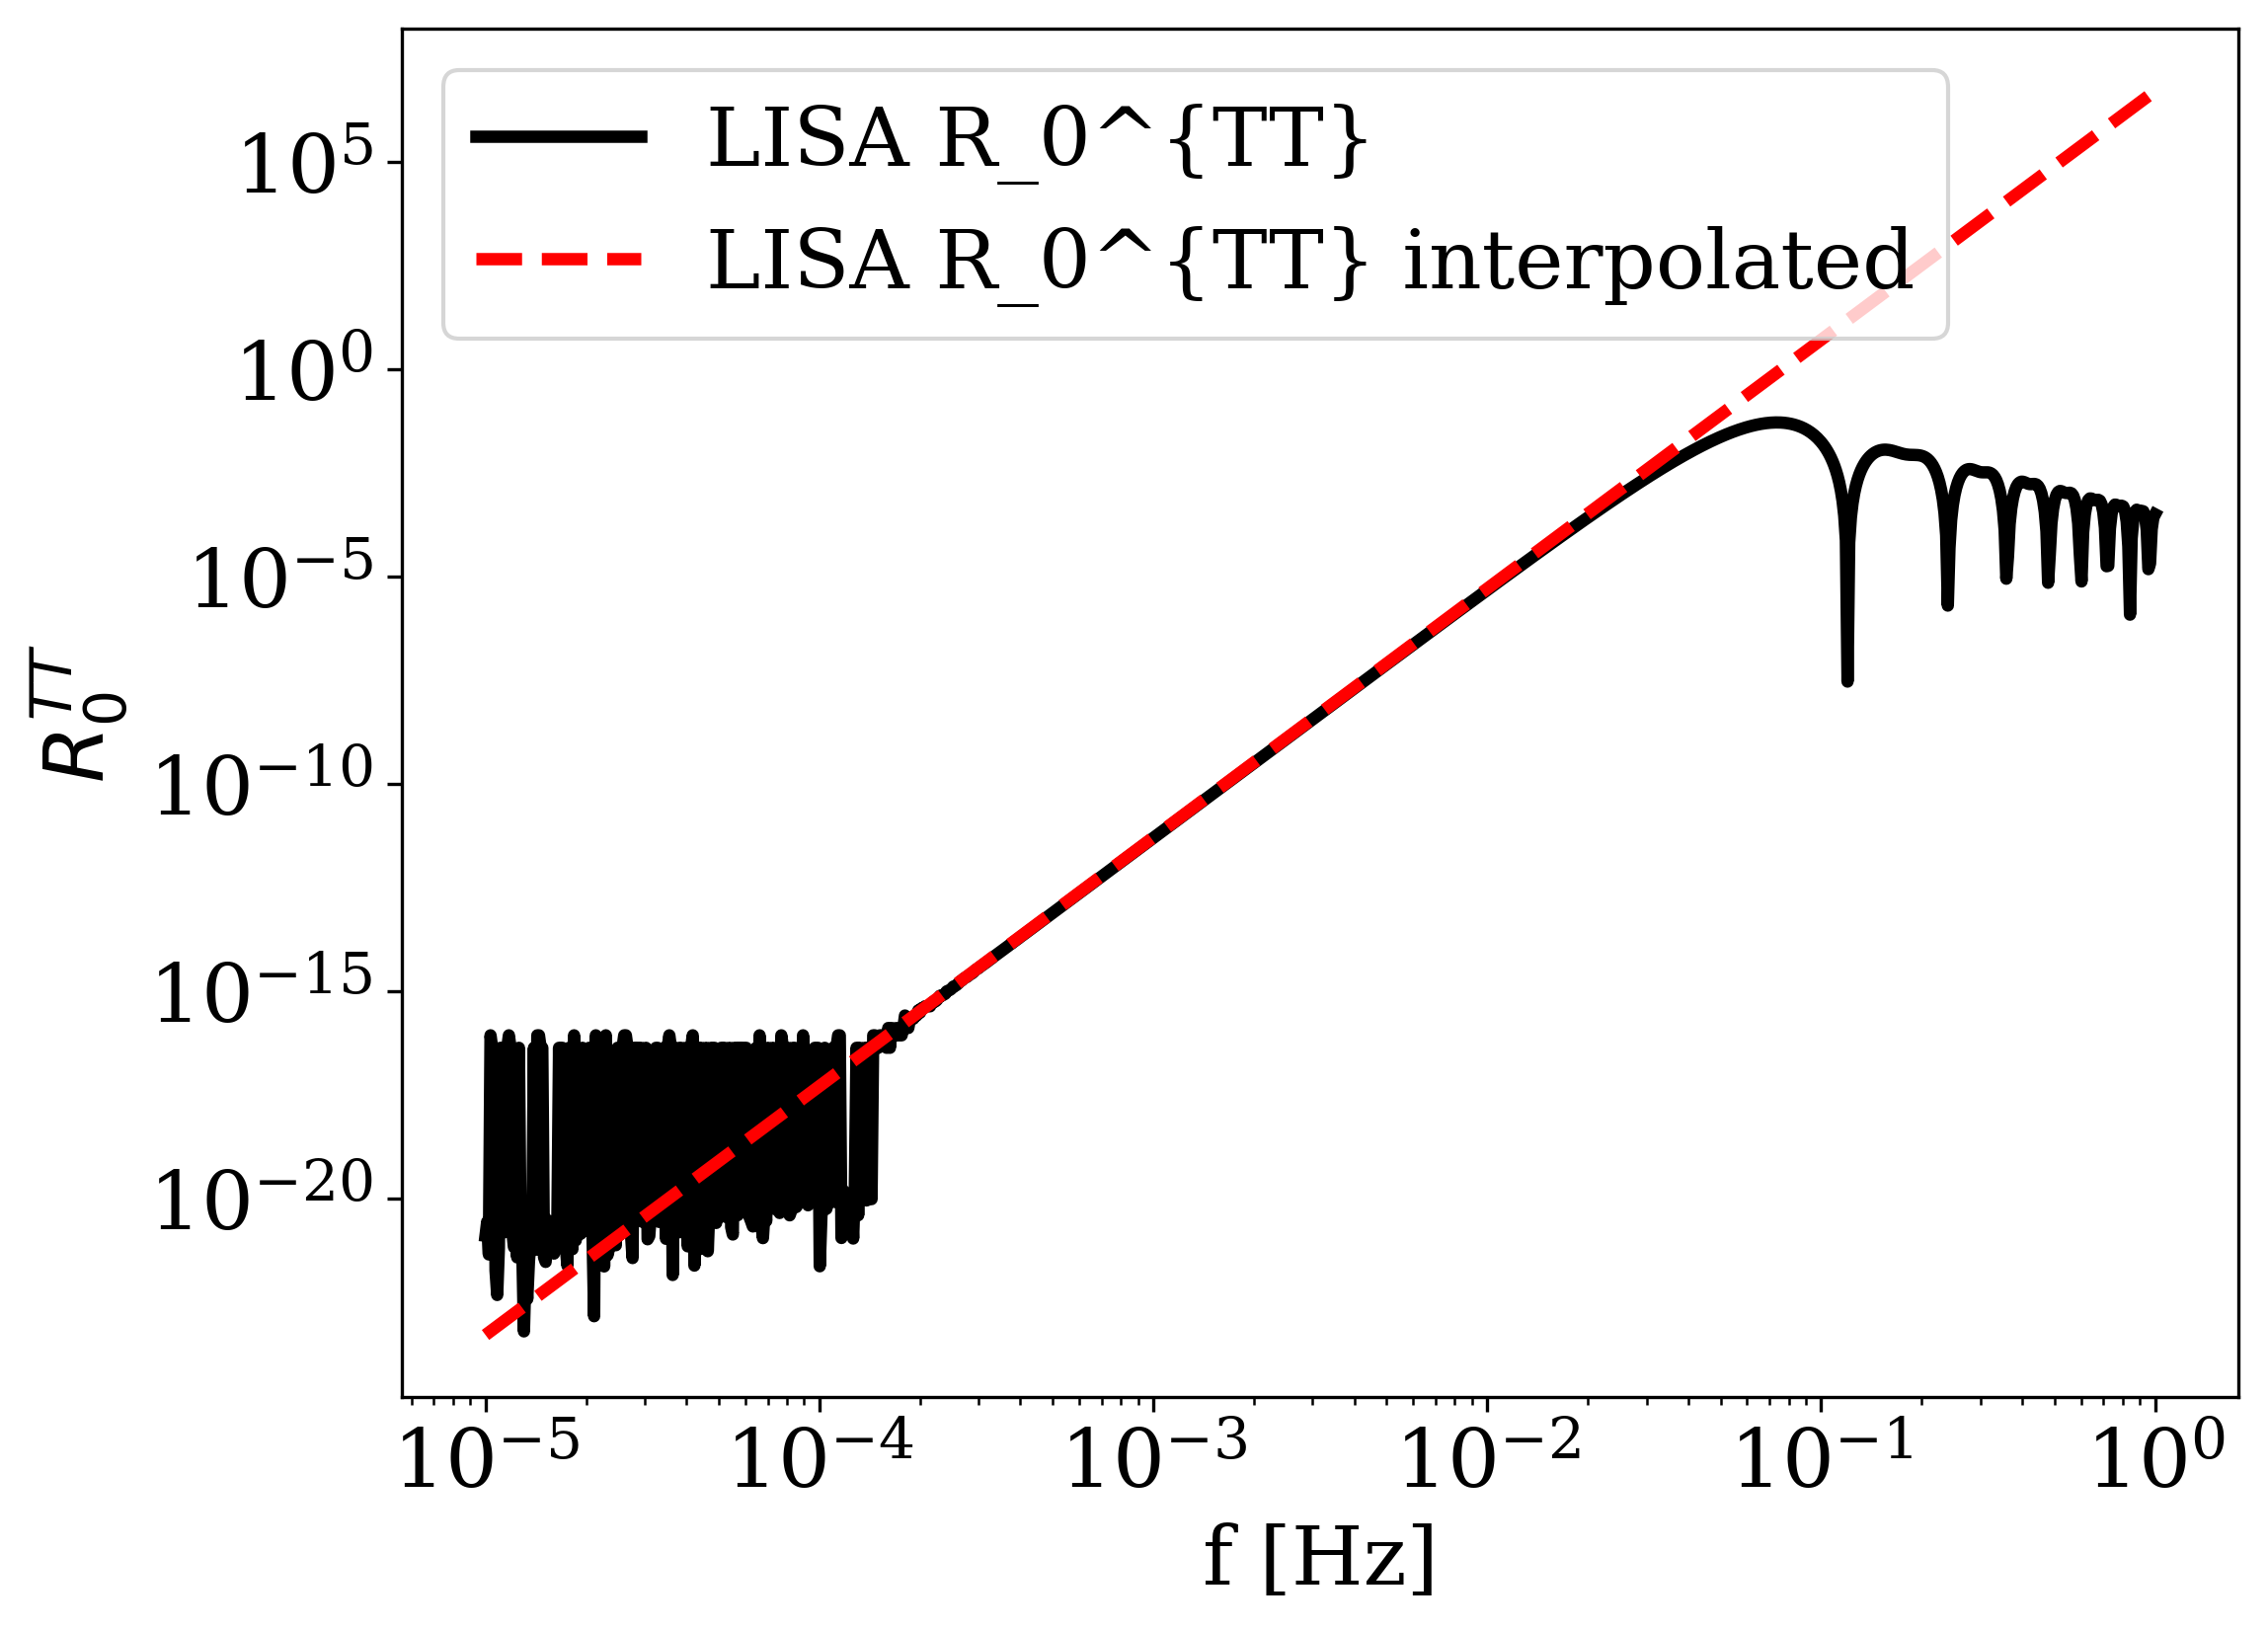

In [103]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_0_TT, label='LISA R_0^{TT}', color='black')
plt.loglog(f, LISA_Rell_0_TT_interpolated, label='LISA R_0^{TT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_0^{TT}$')
# plt.xlim([3e-3, 1])
# plt.ylim([1e-7, 2e-1])
plt.legend()


# R_2 TT

In [104]:
LISA_Rell_2_TT = nell.AngularResponse.R_ell_AET(2, 'TT', 't', f)
LISA_Rell_2_TT_interpolated = 73* x**8 /(7983360* np.sqrt(5))

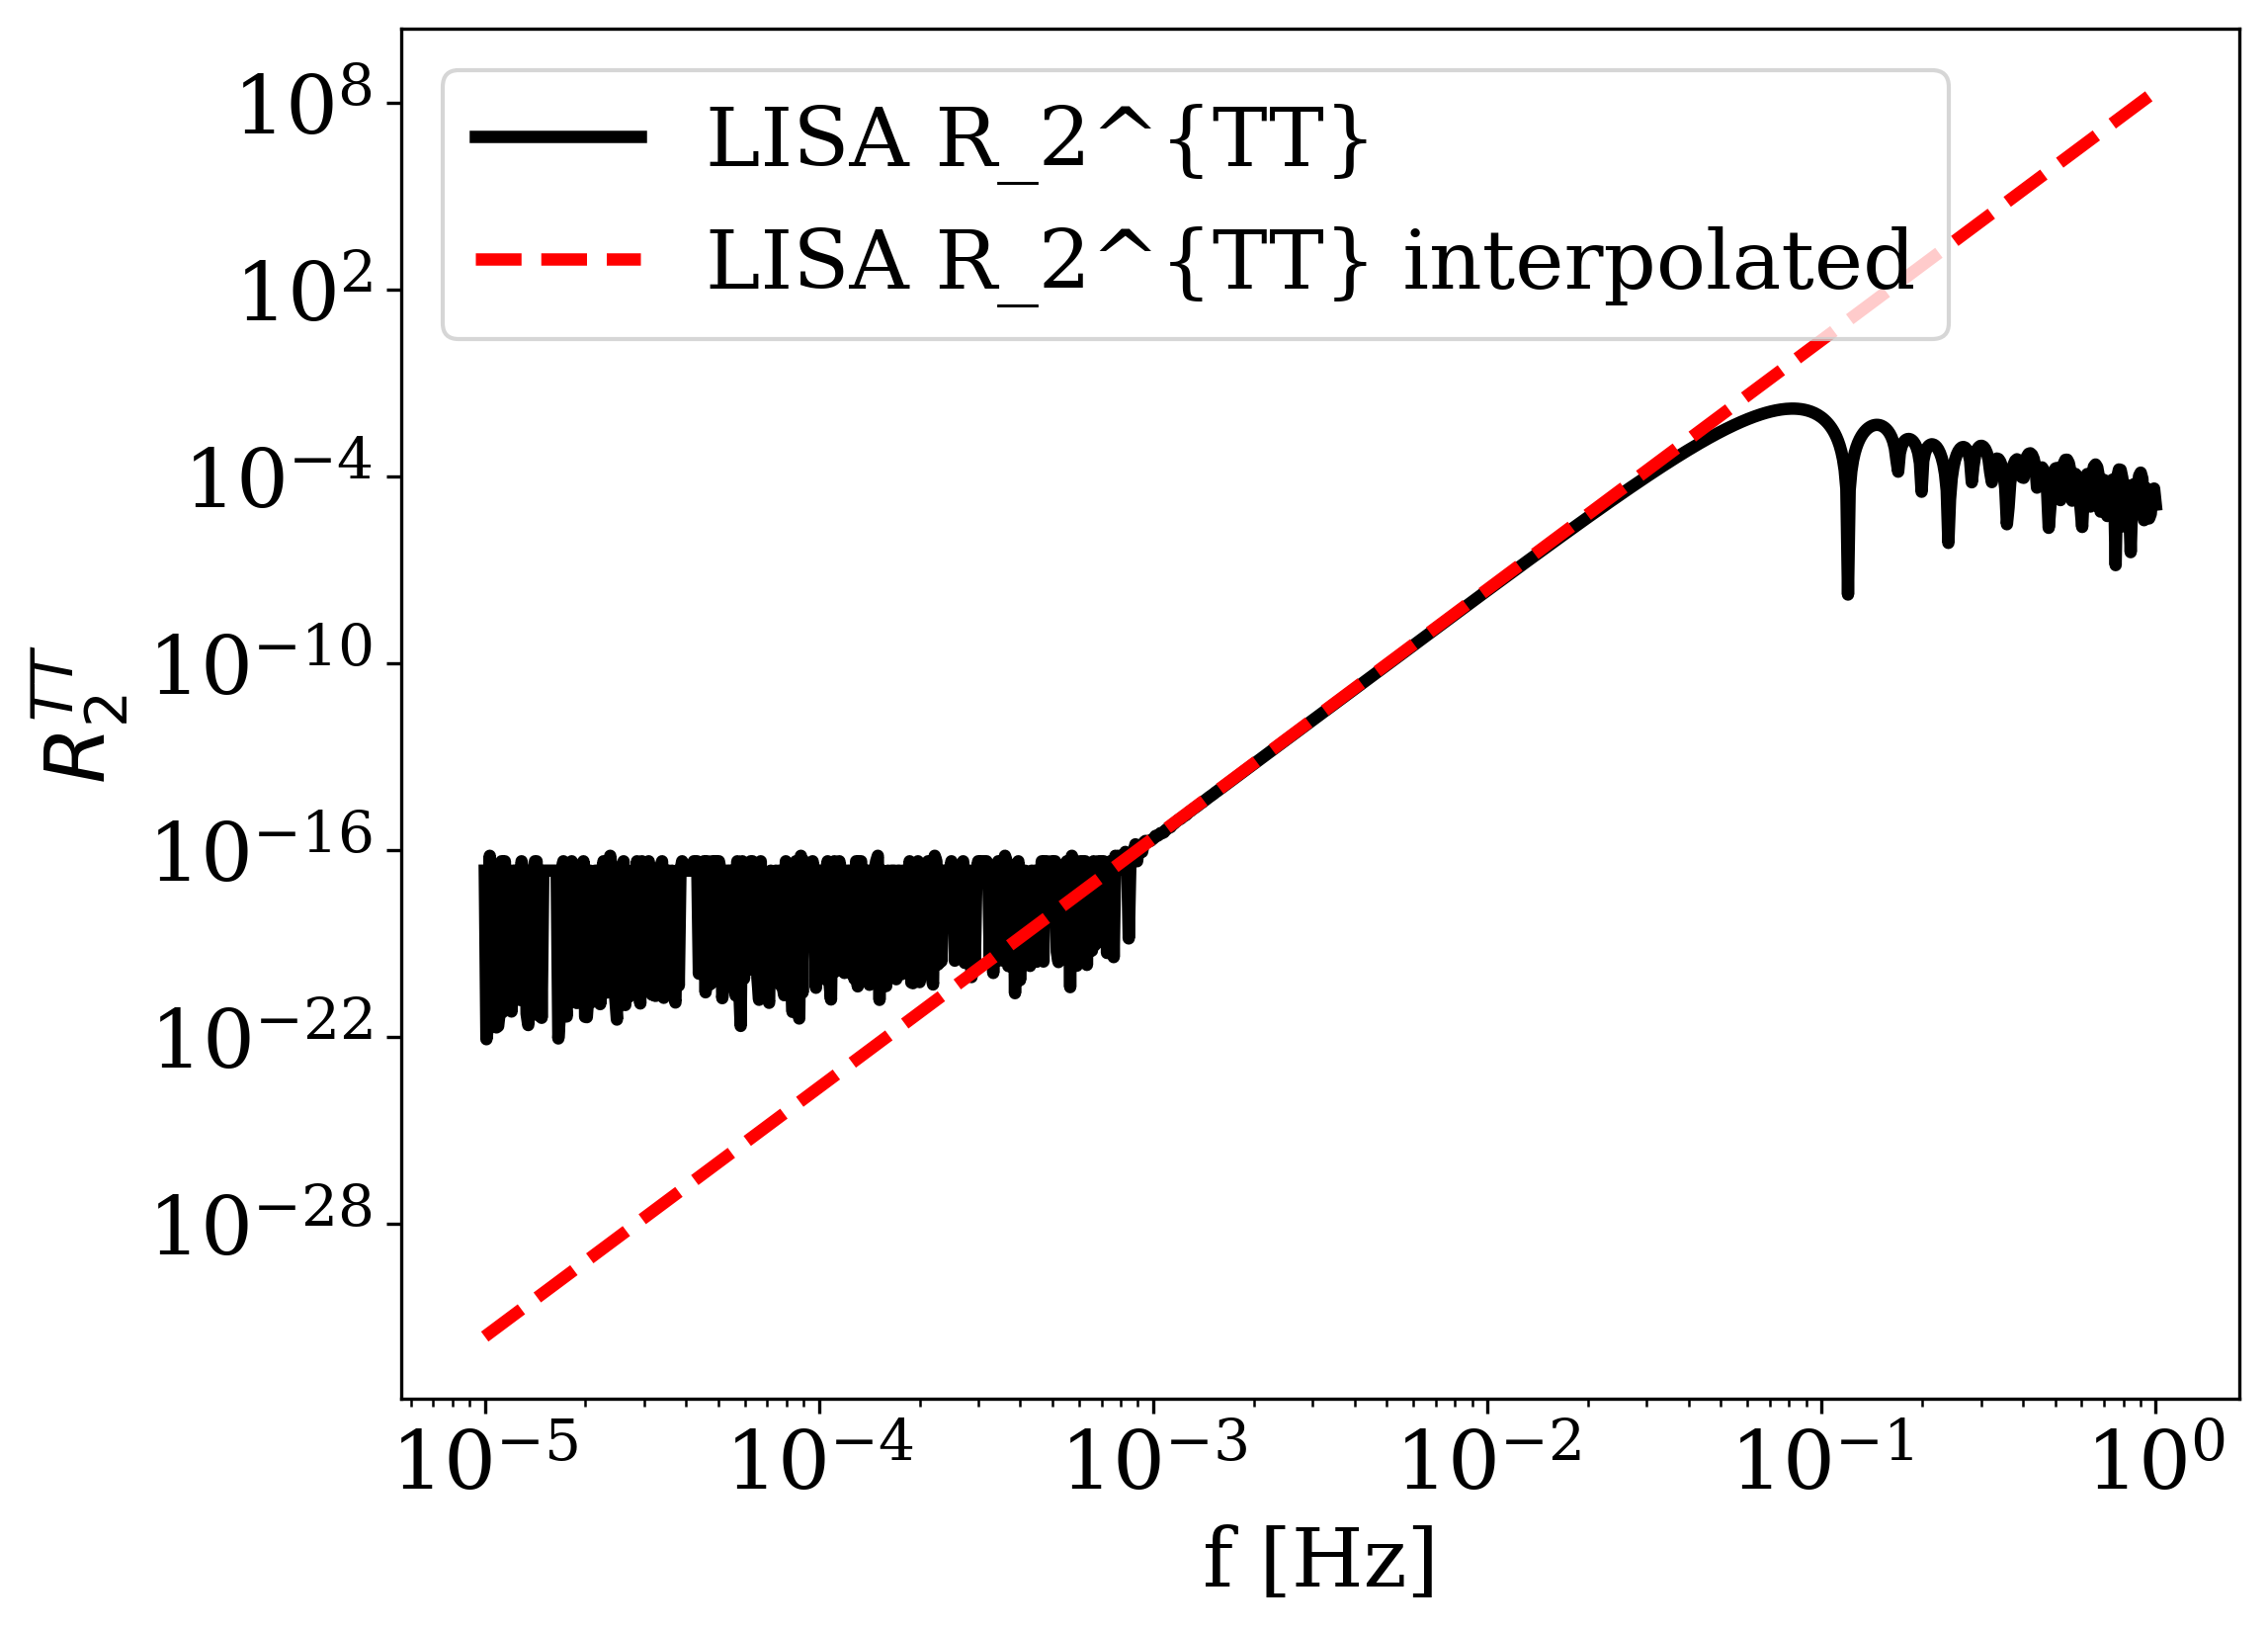

In [105]:
# plot 

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_2_TT, label='LISA R_2^{TT}', color='black')
plt.loglog(f, LISA_Rell_2_TT_interpolated, label='LISA R_2^{TT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_2^{TT}$')
plt.legend()


# R_3 AE

In [106]:
LISA_Rell_3_AE = nell.AngularResponse.R_ell_AET(3, 'AE', 't', f)
LISA_Rell_3_AE_interpolated = np.sqrt(7/30)*x/8

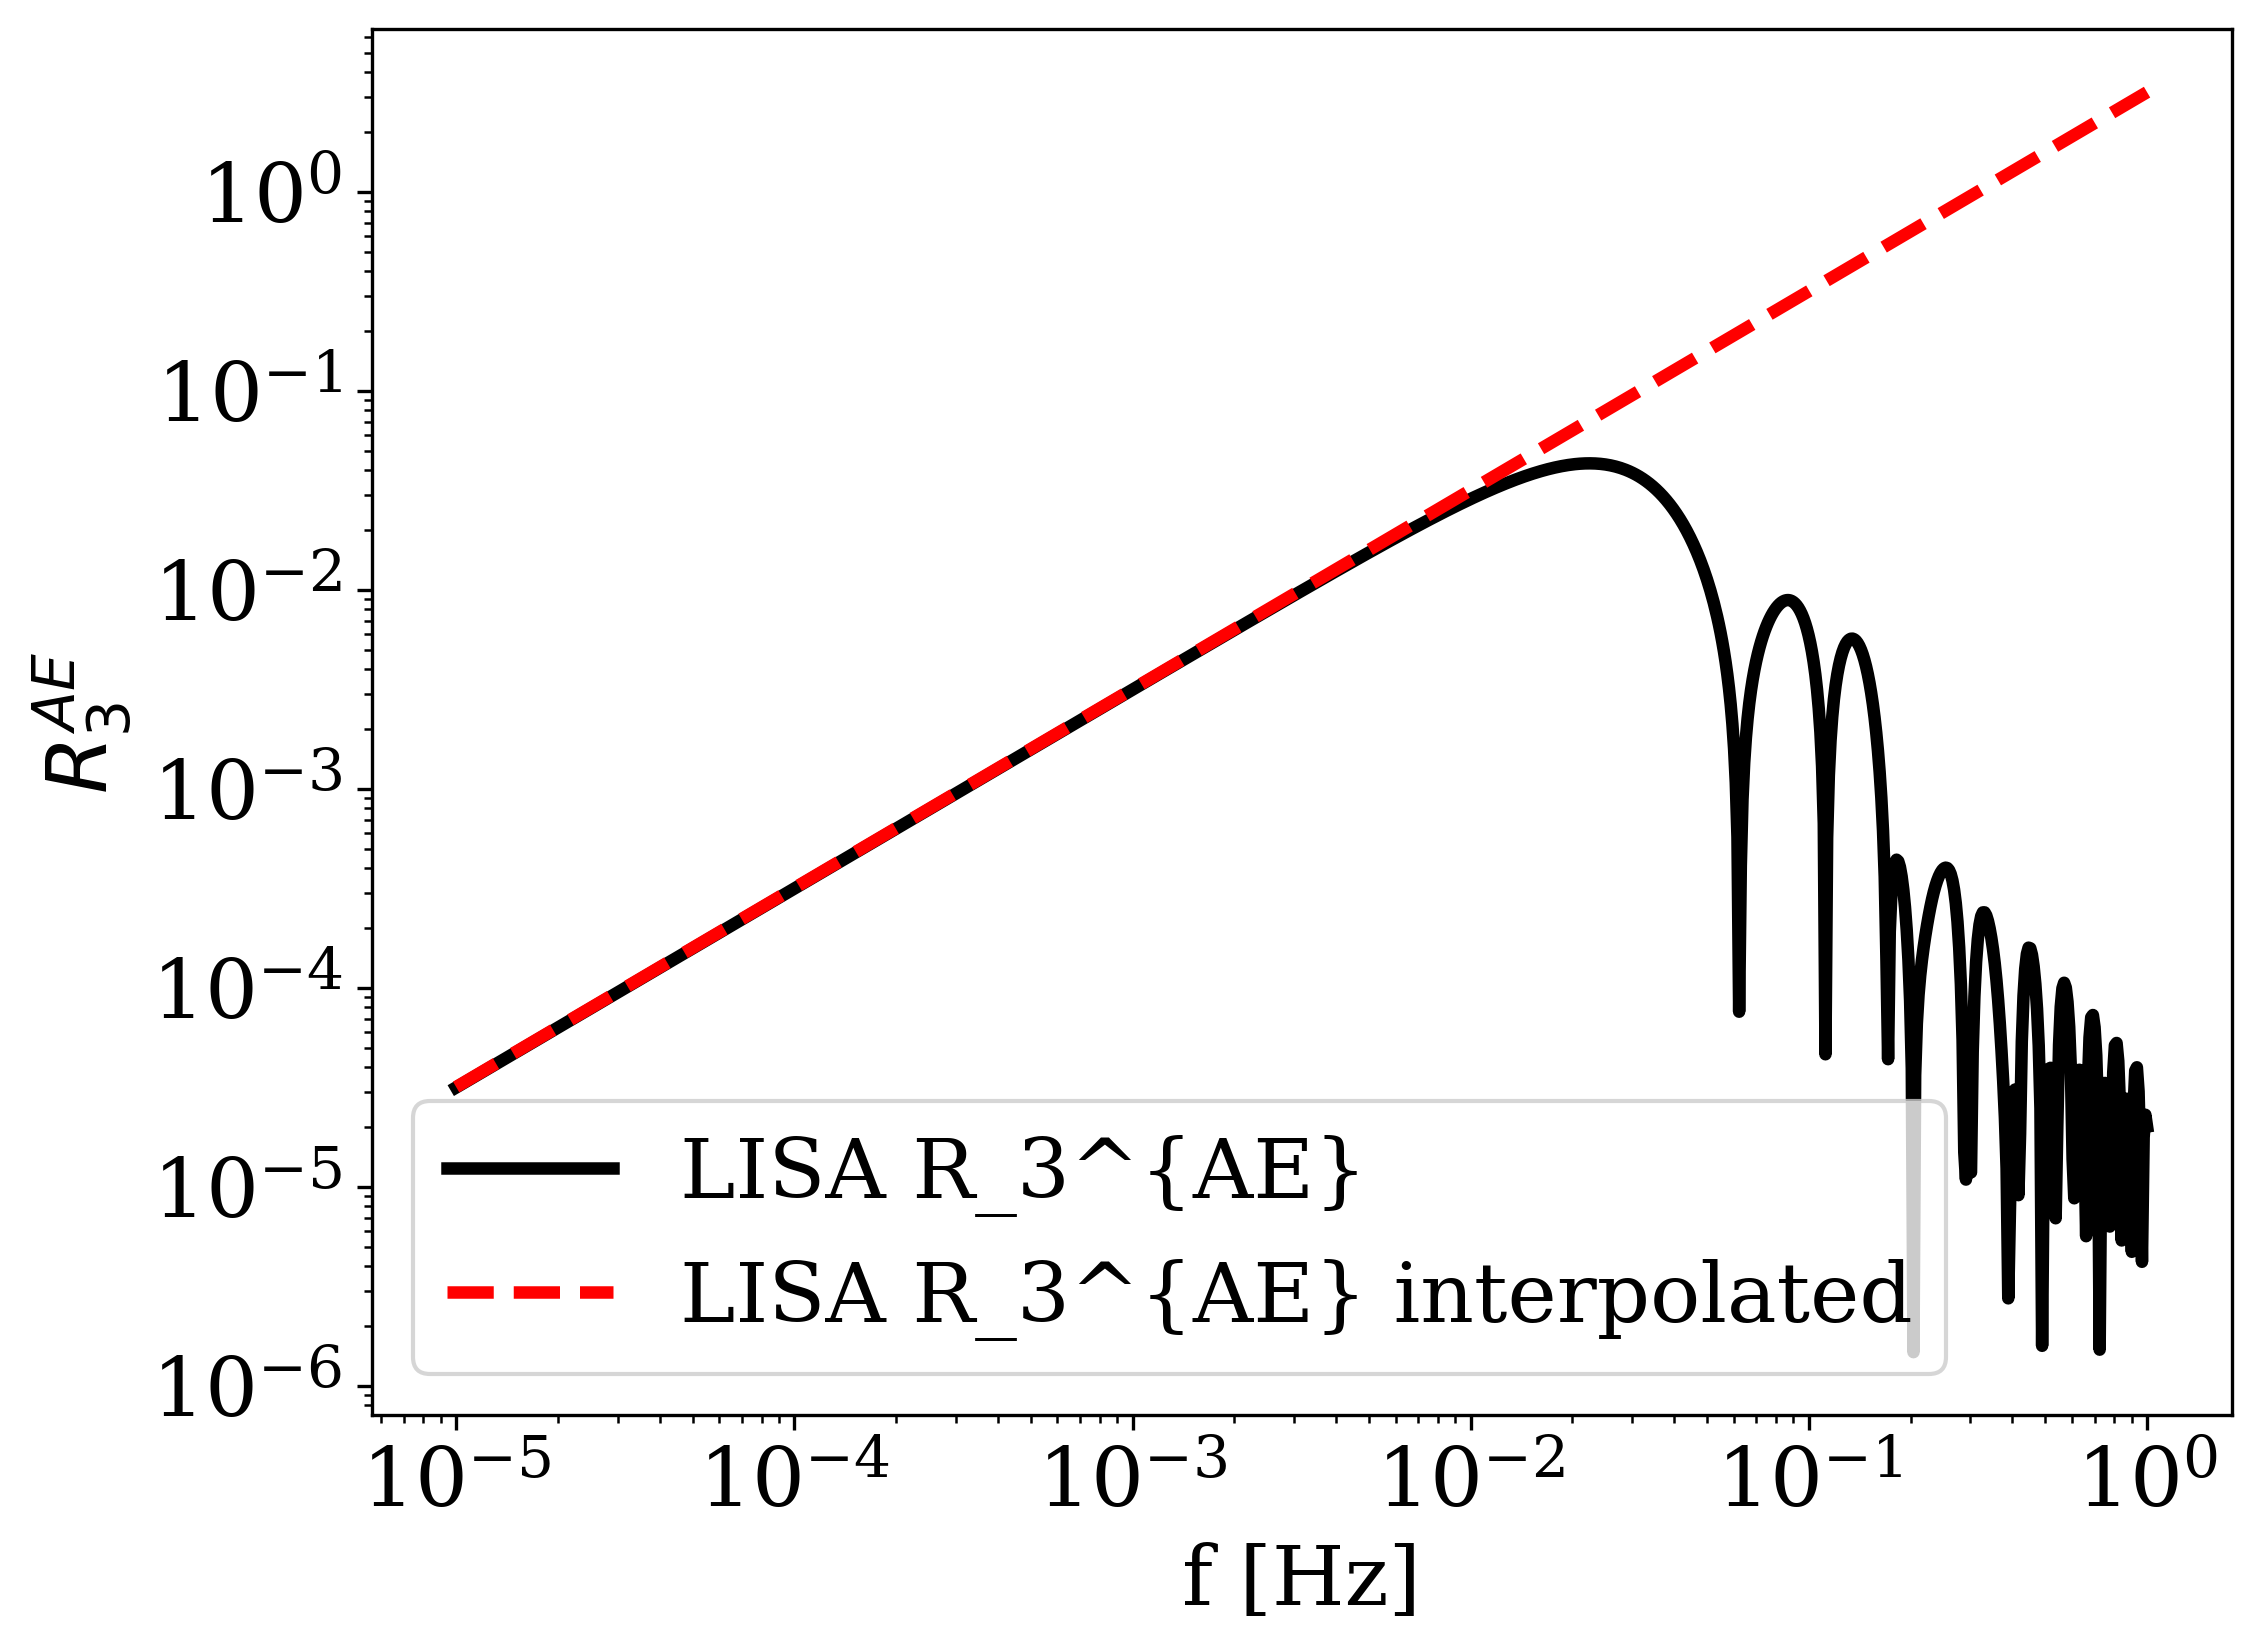

In [107]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_3_AE, label='LISA R_3^{AE}', color='black')
plt.loglog(f, LISA_Rell_3_AE_interpolated, label='LISA R_3^{AE} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AE}$')
plt.legend()

# R_1 AT

In [108]:
LISA_Rell_1_AT = nell.AngularResponse.R_ell_AET(1, 'AT', 't', f)
LISA_Rell_1_AT_interpolated = x**3/(112*np.sqrt(12))

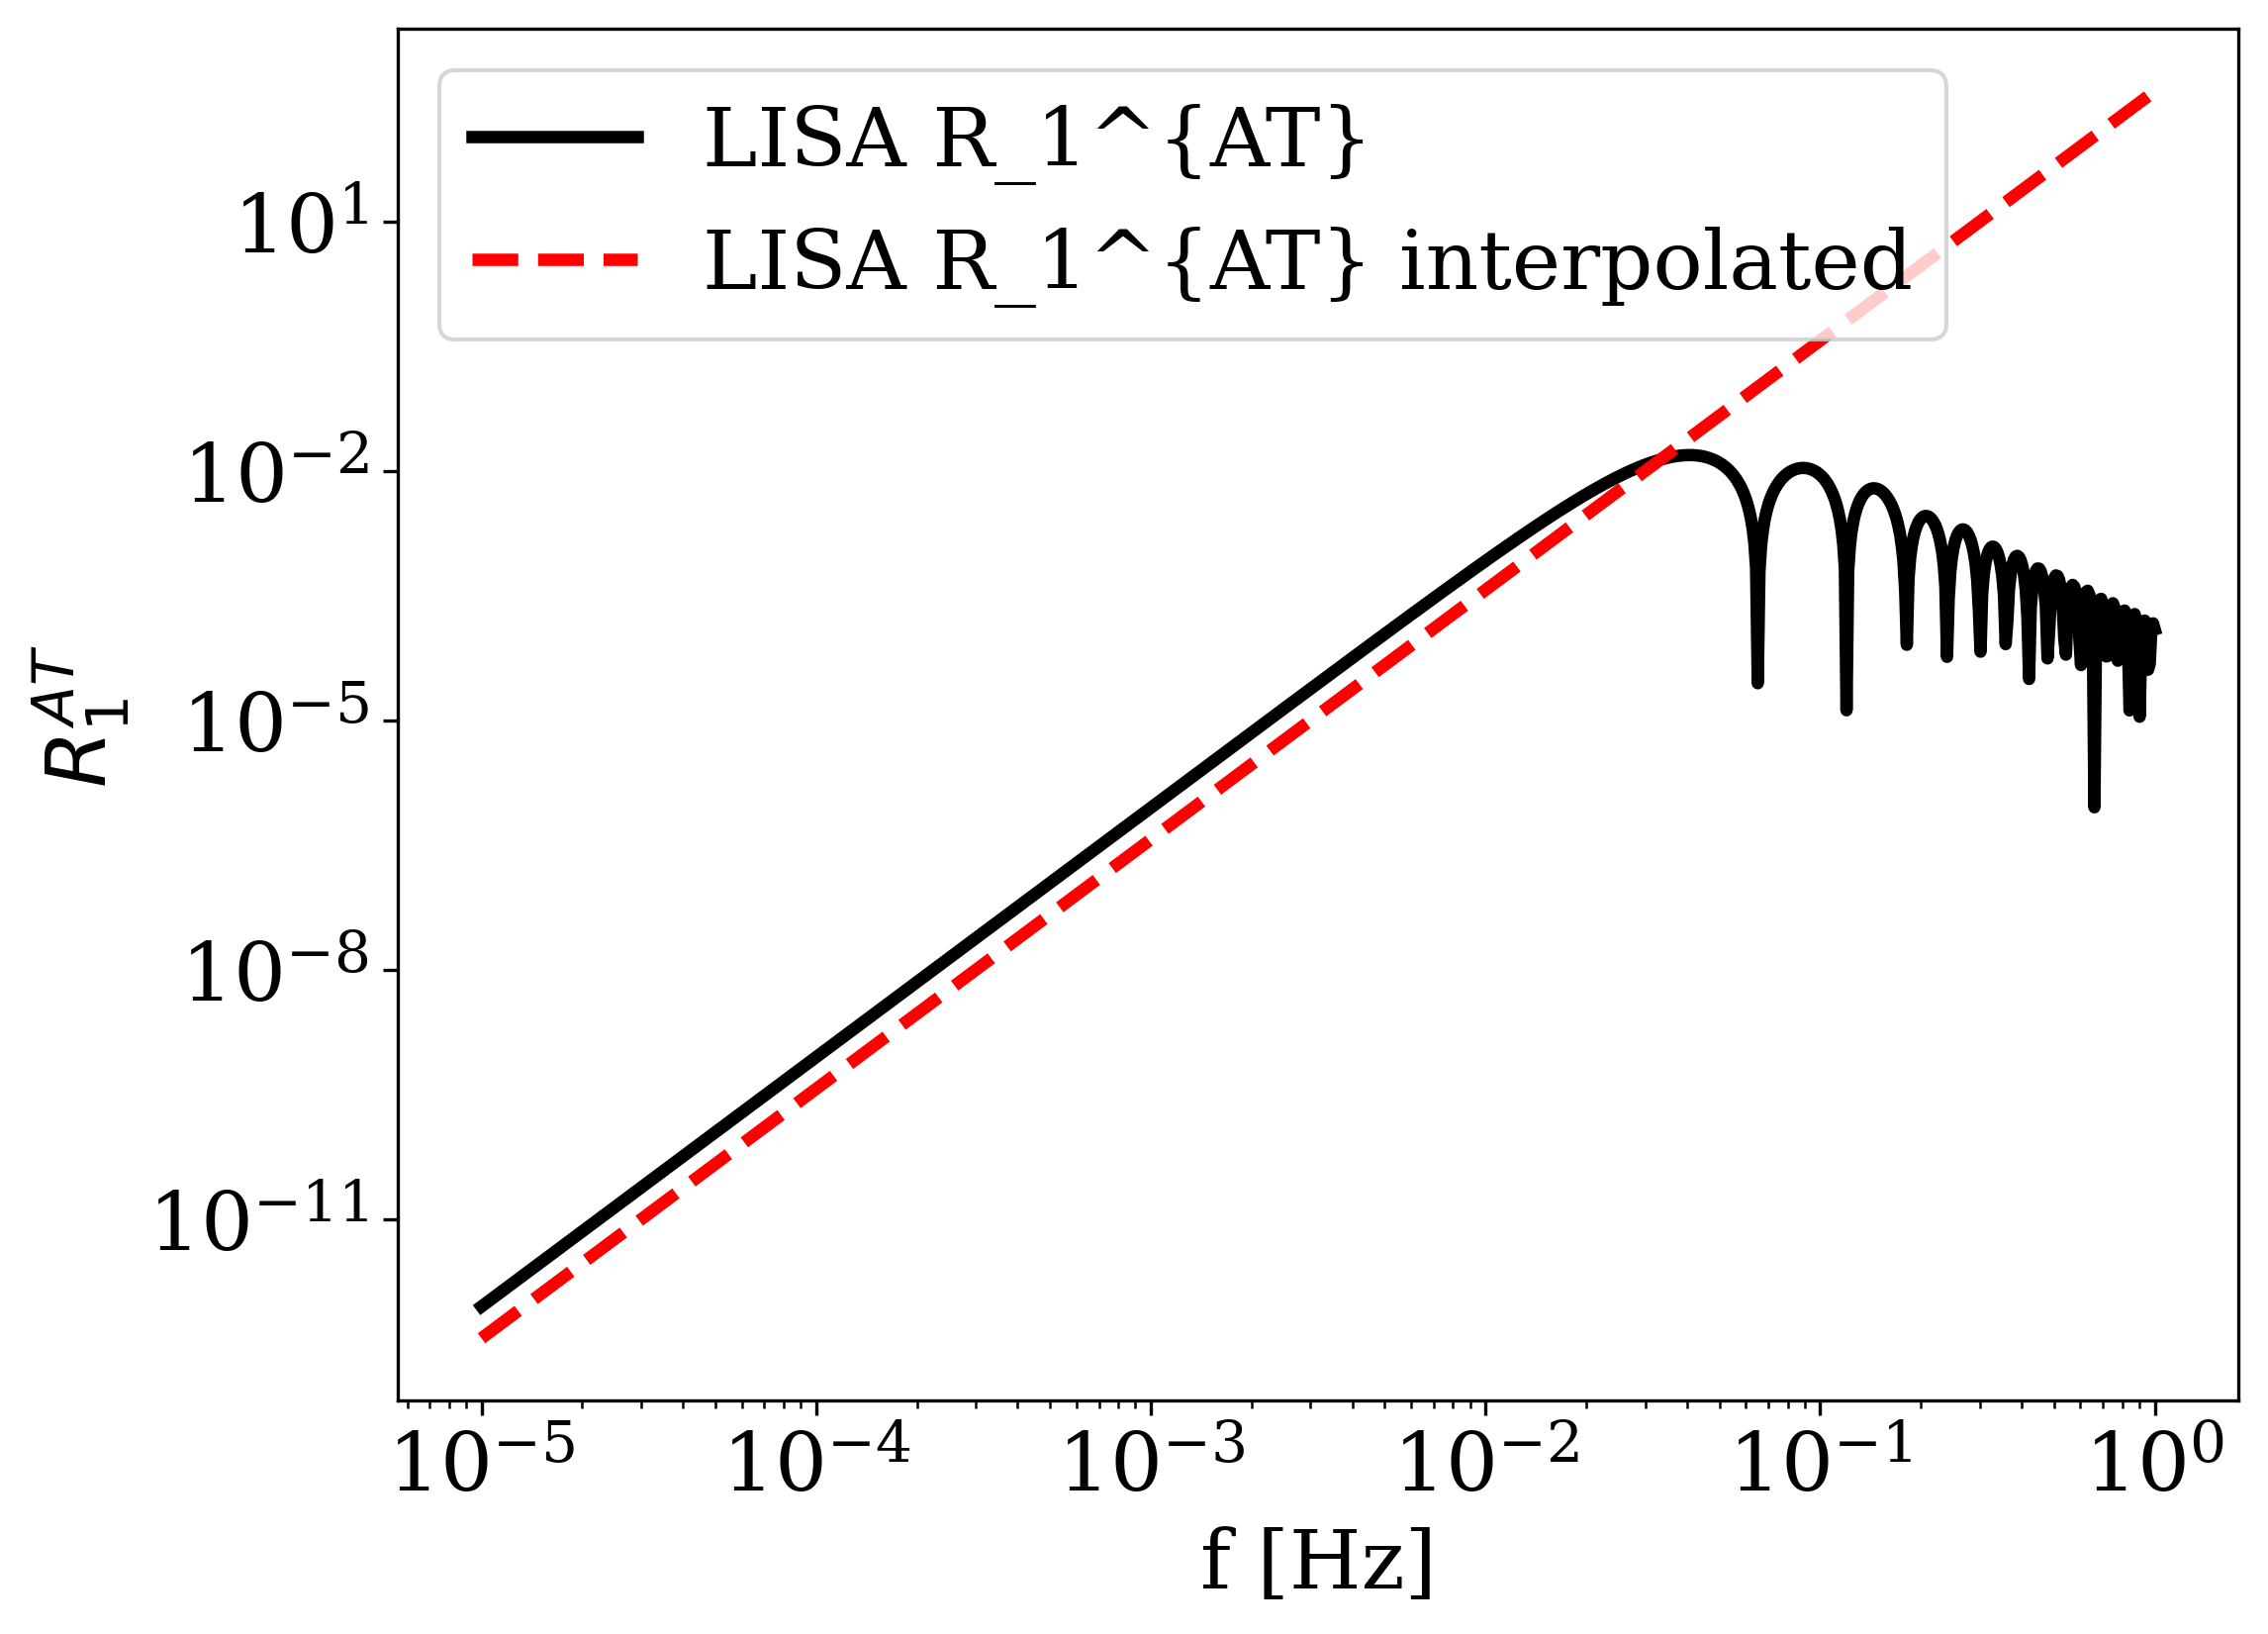

In [109]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_1_AT, label='LISA R_1^{AT}', color='black')
plt.loglog(f, LISA_Rell_1_AT_interpolated, label='LISA R_1^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_1^{AT}$')
plt.legend()



# R_3 AT

In [110]:
LISA_Rell_3_AT = nell.AngularResponse.R_ell_AET(3, 'AT', 't', f)
LISA_Rell_3_AT_interpolated = x**3/(96*np.sqrt(7))

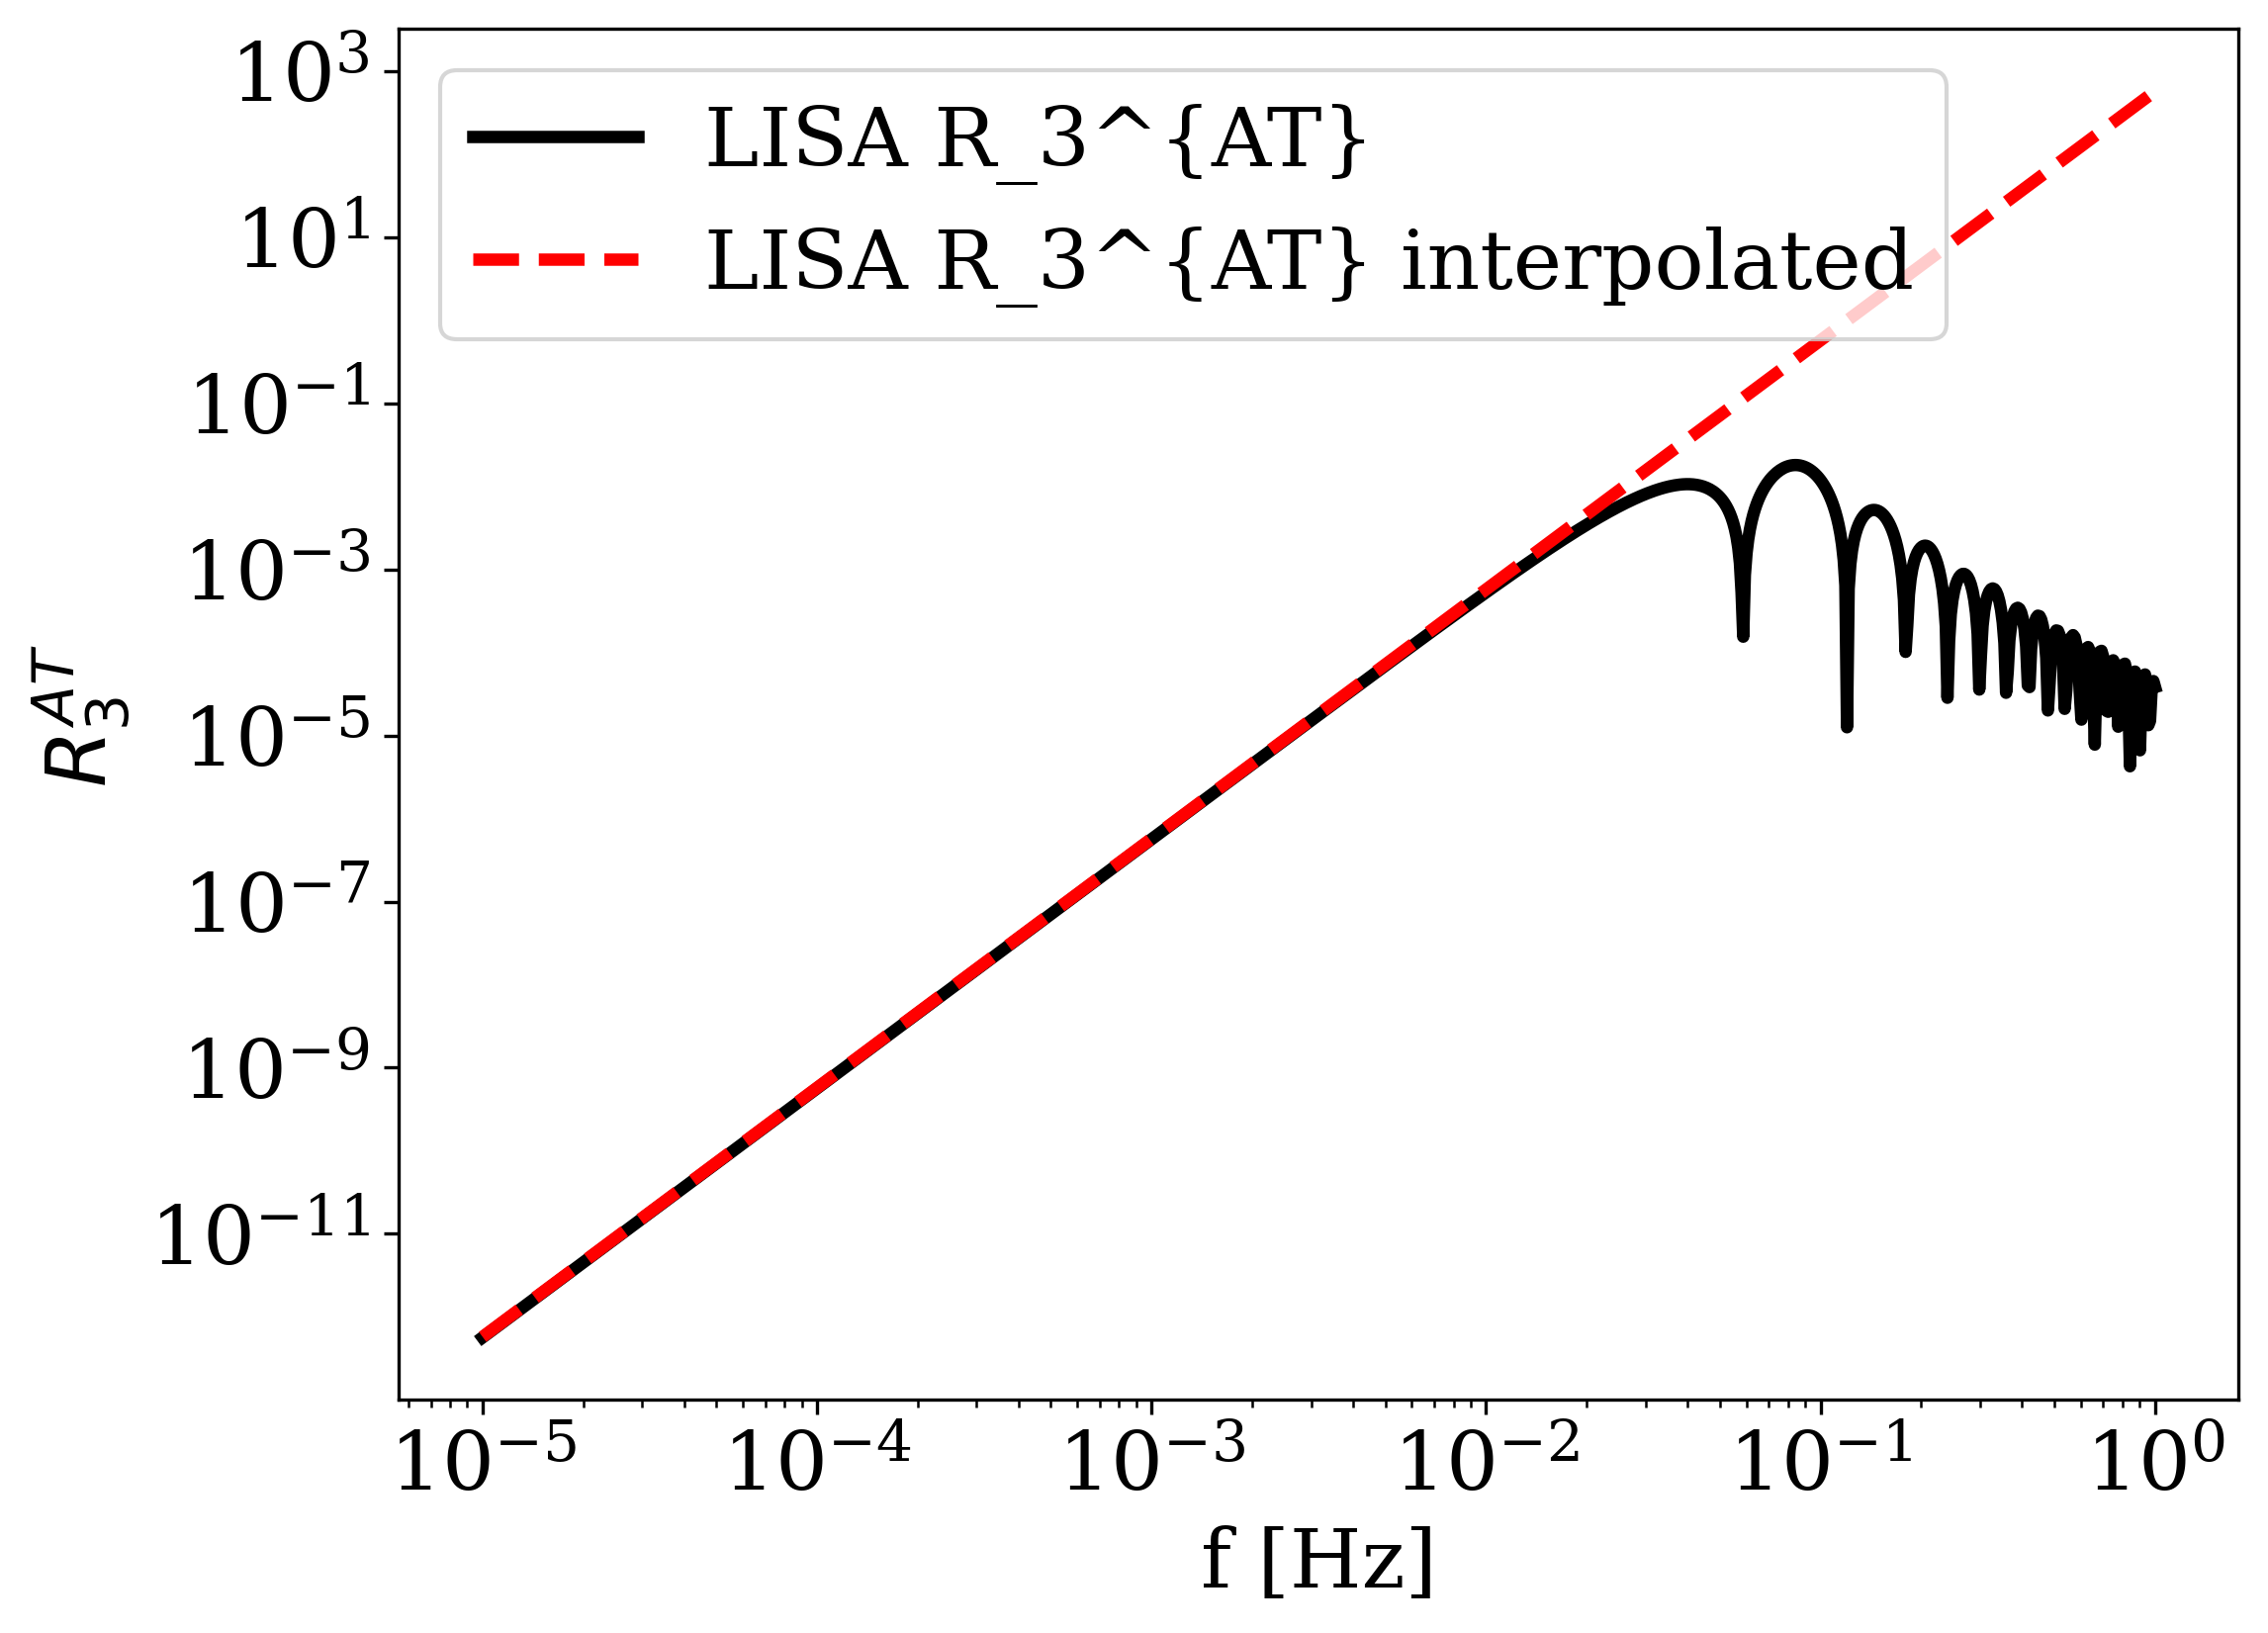

In [111]:
# plot

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.loglog(f, LISA_Rell_3_AT, label='LISA R_3^{AT}', color='black')
plt.loglog(f, LISA_Rell_3_AT_interpolated, label='LISA R_3^{AT} interpolated', color='red', linestyle='--')
plt.xlabel('f [Hz]')
plt.ylabel(r'$R_3^{AT}$')
plt.legend()